## Teoría de señales

María Alejandra Gonzalez Duque    cc.1006109184

Lina María Chavarro Meza       cc.193516928

Yuli Fernanda Ruiz Goyes        cc.1089030069

In [ ]:
!pip install lcapy==1.14

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.2 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import gamma
from lcapy import Circuit, j , omega, s
from scipy import signal


from scipy.signal import lti
from scipy.stats import expon
import scipy.fftpack as fourier
from scipy.fftpack import fft,fftfreq,fftshift
import seaborn as sns  ##HISTOGRAMAS
from numpy import logspace
import sympy as sym

# Parte 1

In [ ]:
#Funciones a utilizar
def gaussian(x, mu, sigma): #definimos una distribucion gaussiana con su fdp y sus parametros
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))#FDP de una gaussiana

 """
      Function that had the FDP of a gaussian distribution
      ---------------------------------------------------------------
      Parameters
      ---------------------------------------------------------------
      mu{float}-- mean of the distribution

      sigma{float}-- variance of the distribution

      Returns
      ---------------------------------------------------------------
      FDP{float}-- The mathematical formula of the FDP of a gaussian distribution

      
     """

def neg_log_likelihood(params, x): ##Funcion de verosimilitud negativa,para minimizar parametros
    mu, sigma = params
    return -np.sum(np.log(gaussian(x, mu, sigma)))

     """
      negative likelihood function to minimize parameters
      ---------------------------------------------------------------
      Parameters
      ---------------------------------------------------------------
      params{float}-- the parameters of the distribution, mean and variance

      Returns
      ---------------------------------------------------------------
      -np.sum(np.log(gaussian(x, mu, sigma))){float}-- The minimize parameters of the function 

      
     """

def fit_gaussian(x): ## Funcion para ajustar una distribucion gaussiana a un conjunto de datos
    result = minimize(neg_log_likelihood, [0, 1], args=(x,))
    mu, sigma = result.x
    return mu, sigma

         """
      function to fit the gaussian distribution to a certain data
      ---------------------------------------------------------------
      Parameters
      ---------------------------------------------------------------
      x{float}-- the data

      Returns
      ---------------------------------------------------------------
      mu {float}-- The fit mean of the distribution

      sigma {float}--- the fit variance of the distribution

      
     """

    

def log_likelihood(lmbda, data): ##Funcion de maxima verosimilitud
    n = len(data)
    return n * np.log(lmbda) - lmbda * np.sum(data)

             """
      maximum likelihood function
      ---------------------------------------------------------------
      Parameters
      ---------------------------------------------------------------
      lmbda{float}-- parameters of the distribution 

      data{float}-- the data

      Returns
      ---------------------------------------------------------------

      n * np.log(lmbda) - lmbda * np.sum(data){float}--- the mathematical formula of the maximum likelihood

      
     """



In [ ]:
# Datos de muestra para la distribución gaussiana
mu = 0.1  # Media verdadera
sigma = 1  # Desviación estándar verdadera
N = 4096  # Número de muestras
data = np.random.normal(loc=mu, scale=sigma, size=N)  # Generar datos de muestra (señal aleatoria)


In [ ]:

# Datos de muestra para la distribución uniforme
Vmin = -1  # limite inferior
Vmax= 1  # limite superior
N = 4096  # Número de muestras
dataz = np.random.uniform(low=Vmin, high=Vmax, size=N) # Generar datos de muestra (señal aleatoria)



# Parte 2

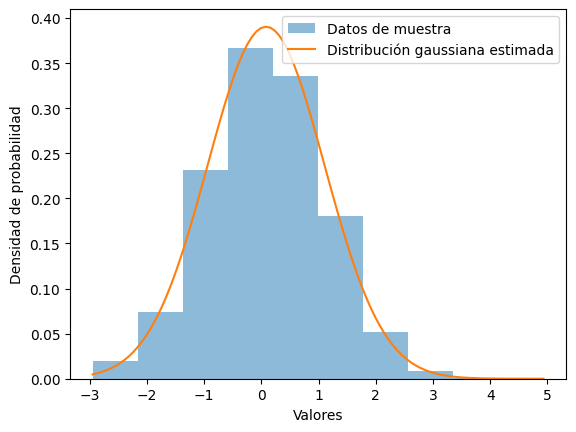

In [ ]:
#Estimación por máxima verosimilitud
# Función de log-verosimilitud para una distribución gaussiana
def log_likelihood(params, data):
    mu, sigma = params  # Parámetros a estimar: media y desviación estándar
    N = len(data)  # Número de muestras
    log_likelihood = -0.5 * N * np.log(2 * np.pi) - N * np.log(sigma) - np.sum((data - mu) ** 2) / (2 * sigma ** 2)  # Fórmula de log-verosimilitud para una distribución gaussiana
    return -log_likelihood  # Se devuelve el negativo del log-verosimilitud para minimizar

        """
      Calculated the negative likelihood function of a gaussian distribution
      ---------------------------------------------------------------
      Parameters
      ---------------------------------------------------------------
      params{float}-- parameters of the distribution (mean and variance in this case) 

      data{float}-- the data

      Returns
      ---------------------------------------------------------------

      -log_likelihood{float}--- negative likelihood function

      
     """

    

# Estimación de máxima verosimilitud para los parámetros de la distribución gaussiana
result = minimize(lambda params: log_likelihood(params, data), x0=[0, 1], method='L-BFGS-B')  # Estimar mu y sigma utilizando el método de máxima verosimilitud
mu_hat, sigma_hat = result.x  # Obtener los valores estimados de mu y sigma

# Generar una grilla de valores para graficar la distribución gaussiana estimada
x = np.linspace(np.min(data), np.max(data), 100)  # Generar una grilla de valores para el eje x
pdf = 1 / (sigma_hat * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu_hat) / sigma_hat) ** 2)  # Calcular los valores de la distribución gaussiana estimada en la grilla de valores x

# Graficar los datos de muestra y la distribución gaussiana estimada
plt.hist(data, density=True, alpha=0.5, label='Datos de muestra')  # Graficar histograma normalizado de los datos de muestra
plt.plot(x, pdf, label='Distribución gaussiana estimada')  # Graficar la distribución gaussiana estimada
plt.legend()  # Agregar leyenda a la gráfica
plt.xlabel('Valores')  # Etiquetar el eje x
plt.ylabel('Densidad de probabilidad')  # Etiquetar el eje y
plt.show()  # Mostrar la gráfica

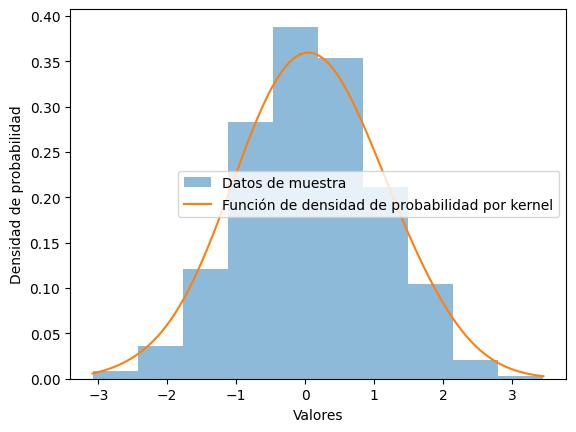

Media estimada: 0.08
Varianza estimada: 0.96


In [ ]:
#Estimación por kernel
from sklearn.neighbors import KernelDensity

# Configuración del tiempo entre puntos en el espacio
dt = 1  # segundos
N = 4096  # Número de muestras
t = np.arange(0, N*dt, dt)  # Vector de tiempo

# Datos de muestra
mu = 0.1  # Media verdadera
sigma = 1  # Desviación estándar verdadera
data = np.random.normal(loc=mu, scale=sigma, size=N)  # Generar datos de muestra (señal aleatoria)

# Estimación de la función de densidad de probabilidad por kernel
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data.reshape(-1, 1))  # Crear el objeto KernelDensity y ajustarlo a los datos
x = np.linspace(np.min(data), np.max(data), 1000)  # Generar una grilla de valores para el eje x
pdf = np.exp(kde.score_samples(x.reshape(-1, 1)))  # Calcular la PDF utilizando el objeto KernelDensity ajustado

# Graficar los datos de muestra y la función de densidad de probabilidad por kernel
plt.hist(data, density=True, alpha=0.5, label='Datos de muestra')  # Graficar histograma normalizado de los datos de muestra
plt.plot(x, pdf, label='Función de densidad de probabilidad por kernel')  # Graficar la función de densidad de probabilidad por kernel
plt.legend()  # Agregar leyenda a la gráfica
plt.xlabel('Valores')  # Etiquetar el eje x
plt.ylabel('Densidad de probabilidad')  # Etiquetar el eje y
plt.show()  # Mostrar la gráfica
print("Media estimada: {:.2f}".format(np.mean(data)))
print("Varianza estimada: {:.2f}".format(np.var(data)))


/tmp/ipykernel_84/1493716250.py:5: RuntimeWarning: invalid value encountered in log
  log_likelihood = -N*np.log(high-low)


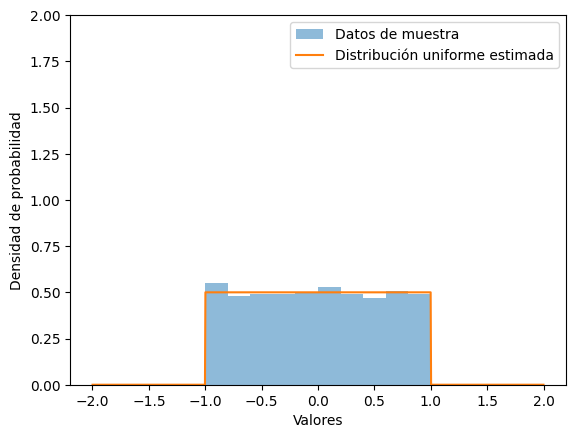

In [ ]:
# Función de log-verosimilitud para una distribución uniforme
def log_likelihood(params, dataz):
    low, high = params  # Parámetros a estimar: Vmin y Vmax
    N = len(dataz)  # Número de muestras
    log_likelihood = -N*np.log(high-low)
    return -log_likelihood  # Se devuelve el negativo del log-verosimilitud para minimizar

       """
      Calculated the negative likelihood function of a uniform distribution
      ---------------------------------------------------------------
      Parameters
      ---------------------------------------------------------------
      params{float}-- parameters of the distribution (Vmin and Vmax in this case) 

      data{float}-- the data

      Returns
      ---------------------------------------------------------------

      -log_likelihood{float}--- negative likelihood function

      
     """

# Estimación de máxima verosimilitud para los parámetros de la distribución uniforme
result = minimize(lambda params: log_likelihood(params, dataz), x0=[-1, 1], method='L-BFGS-B')  # Estimar vmin y vmax utilizando el método de máxima verosimilitud
low_hat, high_hat = result.x  # Obtener los valores estimados de vmin y vmax
N = len(dataz) 

# Generar una grilla de valores para graficar la distribución uniforme estimada
x = np.linspace((np.min(dataz)-1), (np.max(dataz)+1), 1000) 

 # Generar una grilla de valores para el eje x
pdf = np.where((x >= low_hat) & (x <= high_hat), 1 / (high_hat - low_hat), 0)  # Calcular los valores de la distribución uniforme estimada en la grilla de valores x

# Graficar los datos de muestra y la distribución uniforme estimada
plt.hist(dataz, density=True, alpha=0.5, label='Datos de muestra')  # Graficar histograma normalizado de los datos de muestra

plt.plot(x,pdf,  label='Distribución uniforme estimada')  # Graficar la distribución uniforme estimada
plt.legend()  # Agregar leyenda a la gráfica
plt.ylim(0,2)
plt.xlabel('Valores')  # Etiquetar el eje x
plt.ylabel('Densidad de probabilidad')  # Etiquetar el eje y
plt.show()  # Mostrar la gráfica

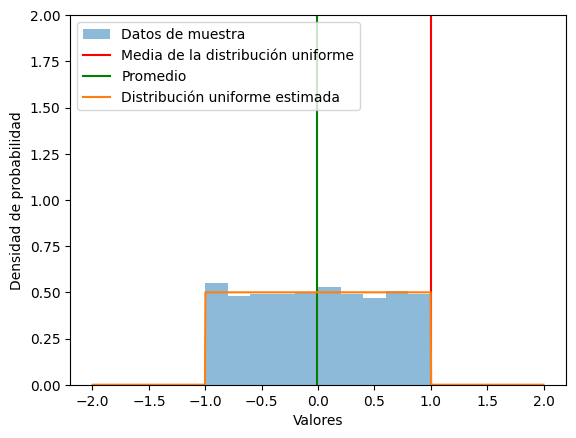

In [ ]:
#Calculamos la  media a partir de la formula de la distribucion y la graficamos

media = (high_hat-low_hat)/2
promedio = np.mean(dataz) #calculamos el promedio de la distribución
varianza = ((high_hat-low_hat)**2/12) #calculamos la varianza con la formula de la distribución
plt.hist(dataz, density=True, alpha=0.5, label='Datos de muestra')  # Graficar histograma normalizado de los datos de muestra
plt.axvline(media, color='r', label='Media de la distribución uniforme') #Linea de la media
plt.axvline(promedio, color='g', label='Promedio') #Linea del promedio
plt.plot(x,pdf,  label='Distribución uniforme estimada')  # Graficar la distribución uniforme estimada
plt.legend()  # Agregar leyenda a la gráfica
plt.ylim(0,2)
plt.xlabel('Valores')  # Etiquetar el eje x
plt.ylabel('Densidad de probabilidad')  # Etiquetar el eje y
plt.show()  # Mostrar la gráficap

In [ ]:
print("La media de la distribución es:",media)
print("La varianza de la distribución es:",varianza)

La media de la distribución es: 1.0
La varianza de la distribución es: 0.3333333333333333


# ´x= x+c

/tmp/ipykernel_84/1493716250.py:5: RuntimeWarning: invalid value encountered in log
  log_likelihood = -N*np.log(high-low)


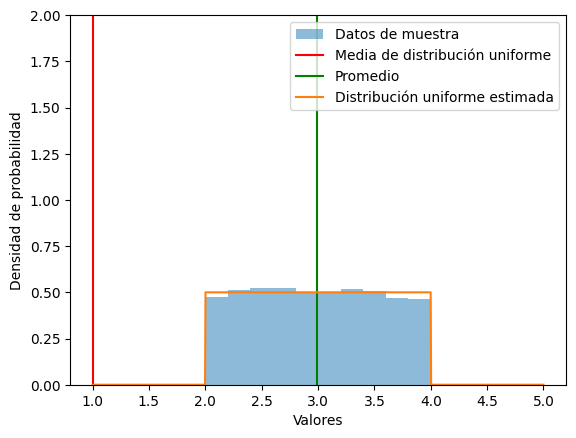

In [ ]:
#Agregandole un valor C a los parametros de la distribución uniforme
c=3
Vmin_c=Vmin+c
Vmax_c=Vmax+c
data2 = np.random.uniform(low=Vmin_c, high=Vmax_c, size=N) #generamos señal
media2= (high_hat-low_hat)/2
promedio2 =np.mean(data2)
varianza2=((high_hat-low_hat)**2/12)

# Estimación de máxima verosimilitud para los parámetros de la distribución gaussiana
result = minimize(lambda params: log_likelihood(params, data2), x0=[2, 4], method='L-BFGS-B')  # Estimar mu y sigma utilizando el método de máxima verosimilitud
low_hat, high_hat = result.x  # Obtener los valores estimados de mu y sigma
N = len(data2) 

media2= (high_hat-low_hat)/2
varianza2=(((high_hat-low_hat)**2)/12)

# Generar una grilla de valores para graficar la distribución gaussiana estimada
x = np.linspace((np.min(data2)-1), (np.max(data2)+1), 1000) 

 # Generar una grilla de valores para el eje x
pdf = np.where((x >= low_hat) & (x <= high_hat), 1 / (high_hat - low_hat), 0)  # Calcular los valores de la distribución uniforme estimada en la grilla de valores x

# Graficar los datos de muestra y la distribución uniforme estimada
plt.hist(data2, density=True, alpha=0.5, label='Datos de muestra')  # Graficar histograma normalizado de los datos de muestra
plt.axvline(media2, color='r', label='Media de distribución uniforme')
plt.axvline(promedio2, color='g', label='Promedio')
plt.plot(x,pdf,  label='Distribución uniforme estimada')  # Graficar la distribución uniforme estimada
plt.legend()  # Agregar leyenda a la gráfica
plt.ylim(0,2)
plt.xlabel('Valores')  # Etiquetar el eje x
plt.ylabel('Densidad de probabilidad')  # Etiquetar el eje y
plt.show()  # Mostrar la gráfica

In [ ]:
print("La media de la distribución es:",media2)
print("La varianza de la distribución es:",varianza2)

La media de la distribución es: 1.0
La varianza de la distribución es: 0.3333333333333333


# ´x=xa

/tmp/ipykernel_84/1493716250.py:5: RuntimeWarning: invalid value encountered in log
  log_likelihood = -N*np.log(high-low)


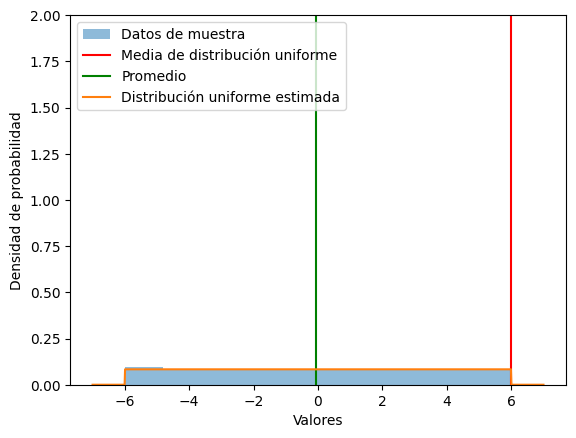

In [ ]:
#Multiplicando un valor A a los parametros de la distribución uniforme
a=6
Vmin_a=Vmin*a
Vmax_a=Vmax*a
data3 = np.random.uniform(low=Vmin_a, high=Vmax_a, size=N)
promedio3 =np.mean(data3)

# Estimación de máxima verosimilitud para los parámetros de la distribución gaussiana
result = minimize(lambda params: log_likelihood(params, data3), x0=[-6, 6], method='L-BFGS-B')  # Estimar mu y sigma utilizando el método de máxima verosimilitud
low_hat, high_hat = result.x  # Obtener los valores estimados de mu y sigma
N = len(data3) 

varianza3=(((high_hat-low_hat)**2)/12)
media3= (high_hat-low_hat)/2

# Generar una grilla de valores para graficar la distribución gaussiana estimada
x = np.linspace((np.min(data3)-1), (np.max(data3)+1), 1000) 

 # Generar una grilla de valores para el eje x
pdf = np.where((x >= low_hat) & (x <= high_hat), 1 / (high_hat - low_hat), 0)  # Calcular los valores de la distribución uniforme estimada en la grilla de valores x

# Graficar los datos de muestra y la distribución uniforme estimada
plt.hist(data3, density=True, alpha=0.5, label='Datos de muestra')  # Graficar histograma normalizado de los datos de muestra
plt.axvline(media3, color='r', label='Media de distribución uniforme')
plt.axvline(promedio3, color='g', label='Promedio')
plt.plot(x,pdf,  label='Distribución uniforme estimada')  # Graficar la distribución uniforme estimada
plt.legend()  # Agregar leyenda a la gráfica
plt.ylim(0,2)
plt.xlabel('Valores')  # Etiquetar el eje x
plt.ylabel('Densidad de probabilidad')  # Etiquetar el eje y
plt.show()  # Mostrar la gráfica

In [ ]:
print("La media de la distribución es:",media3)
print("La varianza de la distribución es:",varianza3)

La media de la distribución es: 6.0
La varianza de la distribución es: 12.0


# Parte 3

In [ ]:
#Generamos el circuito
ctt=Circuit(
"""
    Vi 1 0_1 step;down
    C1 1 2; right, size=1.5
    R1 2 0; down, size=1.5
    C2 3 0_2; right, size=1.5
    R2 2 3; right, size=1.5
    
    W 0_1 0;right
    W 0 0_2;right
    

"""
)


In [ ]:
##cct.draw() 
## V1 1 0 SIN(0 1 1k) ; Fuente de voltaje senoidal de 1kHz, amplitud de 1V

In [ ]:
#Generamos la función de transferencia
H=(ctt.C2.V(s)/ctt.Vi.V(s)).simplify()
H

                   C₁⋅R₁⋅s                    
──────────────────────────────────────────────
             2                                
C₁⋅C₂⋅R₁⋅R₂⋅s  + s⋅(C₁⋅R₁ + C₂⋅R₁ + C₂⋅R₂) + 1

In [ ]:
#Le asignamos valores a los componentes
C1=44.7e-1
C2=0.007e-1
R1=6
R2=6
#escribimos los valores del numerador y denominador de la FT
Coeficientes_num=[C1*R1,0]
Coeficientes_dem=[C1*C2*R2*R1,C1*R1+C2*R1+C2*R2,1]

In [ ]:
#Reemplazamos los componentes con los valores ya asignados
H_valores=H.subs("C1",C1).subs("C2",C2).subs("R1",R1).subs("R2",R2)

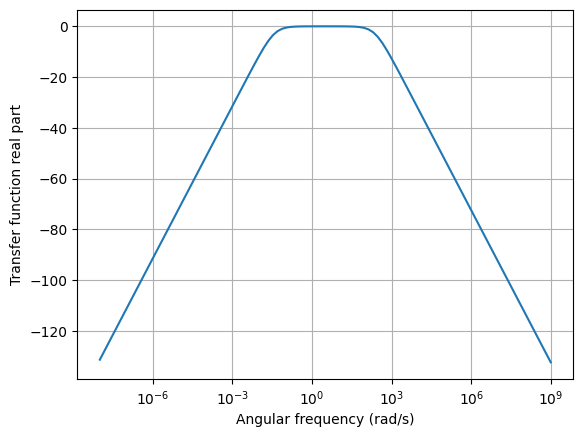

In [ ]:
#Graficamos la funcion de transferencia (pasabandas)
W=logspace(-8,9,100)##Generamos vector de frecuencias 
X=H_valores(j*omega).dB.plot(W,log_frequency=True) #graficar la magnitud en db de la ft


In [ ]:
lti_system=lti(Coeficientes_num,Coeficientes_dem) #con esta funcion se haya la ft
Nsample=4096 #número de muestras
T,h_imp=lti_system.impulse(N=Nsample) #calcula la respuesta al impulso de un sistema, entregando el vector de tiempo y la respuesta al impulso

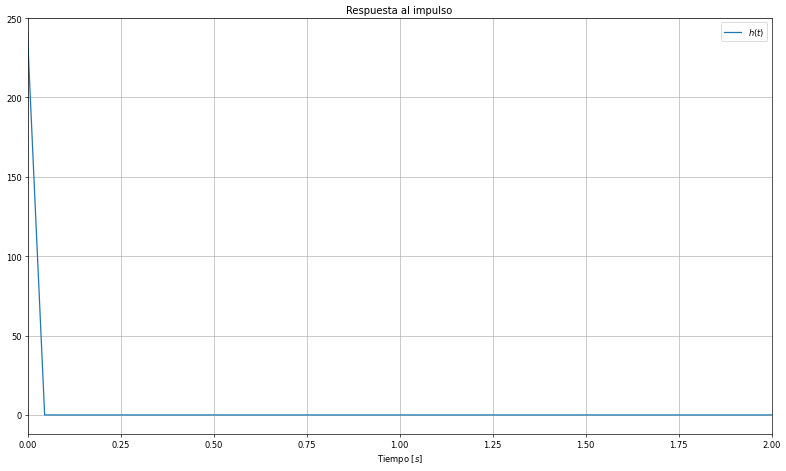

In [ ]:
#Graficamos la respuesta al impulso del circuito
plt.figure(figsize=(16,9), dpi=60)
plt.plot(T,h_imp, label="$h(t)$")
plt.xlim(0,2)
plt.grid(True)
plt.legend()
plt.title("Respuesta al impulso")
plt.xlabel("Tiempo [$s$]")
plt.show()

# Parte 4

In [ ]:
# print(data.shape)
# #Convolucion de la señal de entrada y respuesta al impulso
# # y = np.convolve(data, h_imp, mode='same')  # Salida del circuito
# plt.plot(t,y)  # Graficar la señal de salida
# plt.plot(t,data)  # Graficar la señal de salida

In [ ]:
Fdisc=Nsample/4 # FRECUENCIA DE MUESTREO
Tdisc=1/Fdisc
t=np.arange(0,4,Tdisc) ## GENERAMOS VECTOR DE TIEMPO PARA NUESTRA FUNCIÓN ALEATORIA
#print(t.shape)
#shape= np.pi     
#gamma= np.random.gamma(shape,size=len(t))
_,Output_Circuit,_=lti_system.output(data, t) ##SALIDA DEL CIRCUITO.
plt.plot(t,data)
plt.plot(t,Output_Circuit)  # Graficar la señal de salida


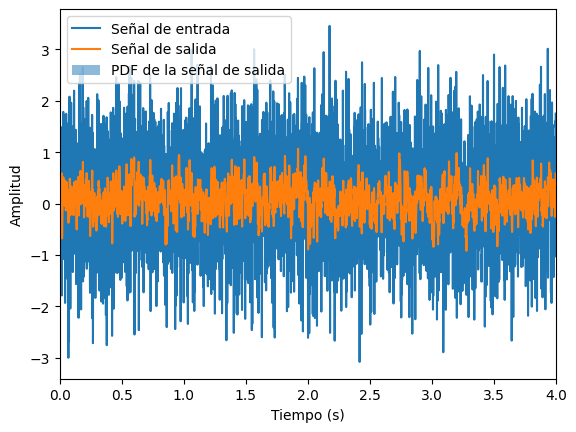

In [ ]:
# Estimar la PDF de la señal de salida utilizando la estimación por kernel
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(Output_Circuit.reshape(-1, 1))  # Crear el objeto KernelDensity y ajustarlo a los datos
x_pdf = np.linspace(np.min(Output_Circuit), np.max(Output_Circuit), 4096)  # Generar una grilla de valores para el eje x
pdf = np.exp(kde.score_samples(x_pdf.reshape(-1, 1)))  # Calcular la PDF utilizando el objeto KernelDensity ajustado

# Graficar la señal de entrada, la señal de salida y la PDF de la señal de salida
plt.plot(t, data, label='Señal de entrada')  # Graficar la señal de entrada
plt.plot(t, Output_Circuit, label='Señal de salida')  # Graficar la señal de salida
plt.fill_between(x_pdf, pdf, alpha=0.5, label='PDF de la señal de salida')  # Graficar la PDF de la señal de salida
plt.legend()  # Agregar leyenda a la gráfica
plt.xlabel('Tiempo (s)')  # Etiquetar el eje x
plt.ylabel('Amplitud')  # Etiquetar el eje y
plt.xlim([0, 4])
plt.show()  # Mostrar la gráfica


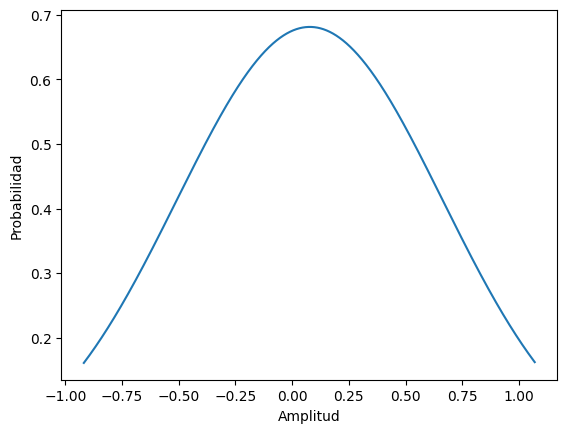

In [ ]:
# Ajustar objeto KernelDensity a los datos de la señal de salida
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(Output_Circuit.reshape(-1, 1))

# Generar una grilla de valores para el eje x
x_pdf = np.linspace(np.min(Output_Circuit), np.max(Output_Circuit), 4096)

# Calcular la función de densidad de probabilidad utilizando el objeto KernelDensity ajustado
pdf = np.exp(kde.score_samples(x_pdf.reshape(-1, 1)))

# Graficar la PDF de la señal de salida
plt.plot(x_pdf, pdf)
plt.xlabel('Amplitud')
plt.ylabel('Probabilidad')
plt.show()


In [ ]:
# Media de la PDF estimada
pdf_mean = np.mean(x_pdf * pdf)
# Varianza de la PDF estimada
pdf_var = np.mean((x_pdf - pdf_mean)**2 * pdf)
print("Media de la señal de salida: {:.2f}".format(pdf_mean))
print("Varianza de la señal de salida: {:.2f}".format(pdf_var))

Media de la señal de salida: 0.03
Varianza de la señal de salida: 0.10


In [ ]:
media_entrada = np.mean(data)
varianza_entrada = np.var(data)
print("Media de la señal de entrada: {:.2f}".format(media_entrada))
print("Varianza de la señal de entrada: {:.2f}".format(varianza_entrada))


Media de la señal de entrada: 0.08
Varianza de la señal de entrada: 0.96


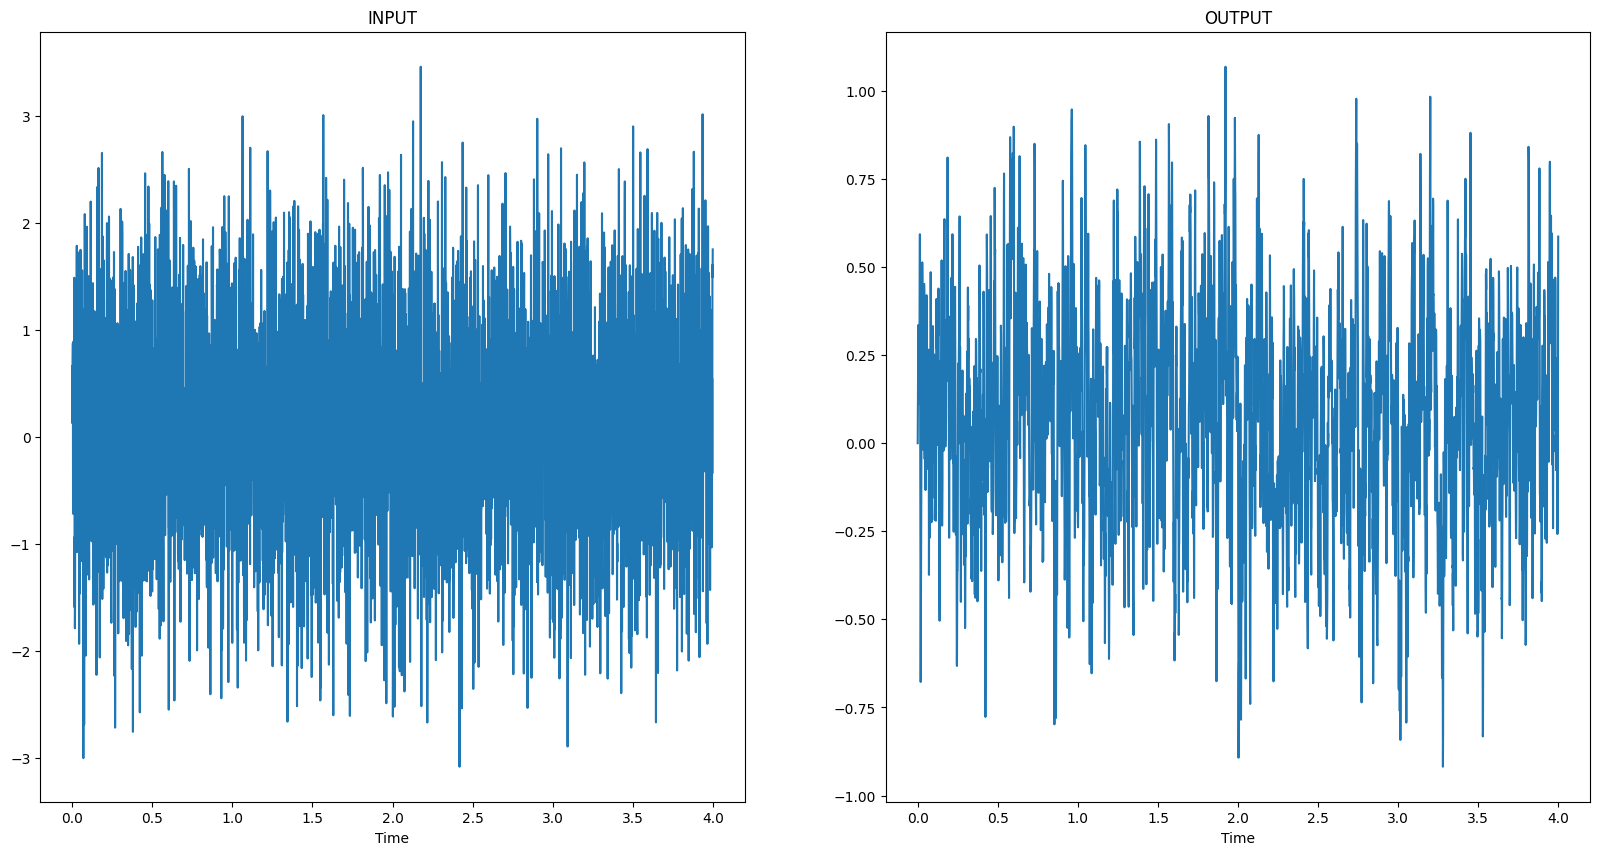

In [ ]:
Autocorrelacion_expt=np.correlate(data,data,mode="same") ## GENERAMOS LA AUTOCORRELACION

Autocorrelacion_Output=np.correlate(Output_Circuit,Output_Circuit,mode="same") 
fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t, data)
axs[0].set_title("INPUT")
axs[0].set_xlabel("Time")
axs[1].plot(t, Output_Circuit)
axs[1].set_title("OUTPUT")
axs[1].set_xlabel("Time")




fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t-2,Autocorrelacion_expt)
axs[0].set_title("Correlate Input")
axs[0].set_xlim(-0.05,0.05)
axs[1].plot(t-2, Autocorrelacion_Output)
axs[1].set_title("Correlate Output")
axs[1].set_xlim(-1,1)


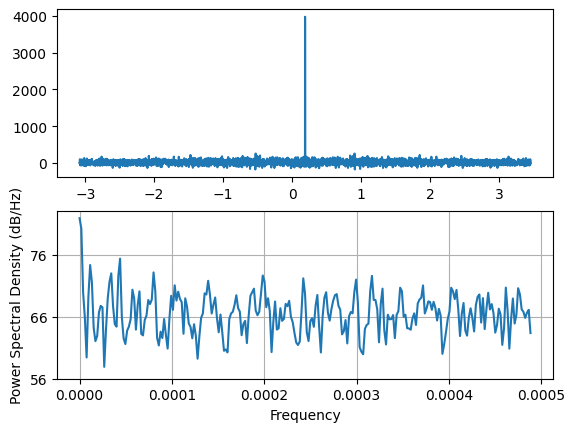

In [ ]:
#Espectro de densidad de potencia de la entrada
ax = np.linspace(np.min(data), np.max(data), 4096)
plt.subplot(211)
plt.plot(ax, Autocorrelacion_expt)
plt.subplot(212)
plt.psd(Autocorrelacion_expt, 512, Tdisc)
 
plt.show()

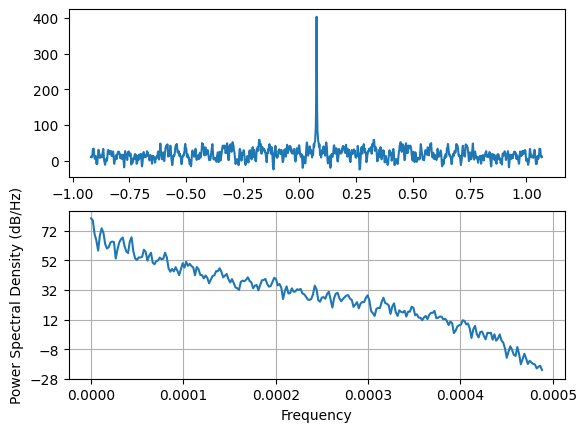

In [ ]:
#Espectro de densidad de potencia de la salida
ax = np.linspace(np.min(data), np.max(data), 4096)
plt.subplot(211)
plt.plot(x_pdf, Autocorrelacion_Output)
plt.subplot(212)
plt.psd(Autocorrelacion_Output, 512, Tdisc)
 
plt.show()

TALLER 2

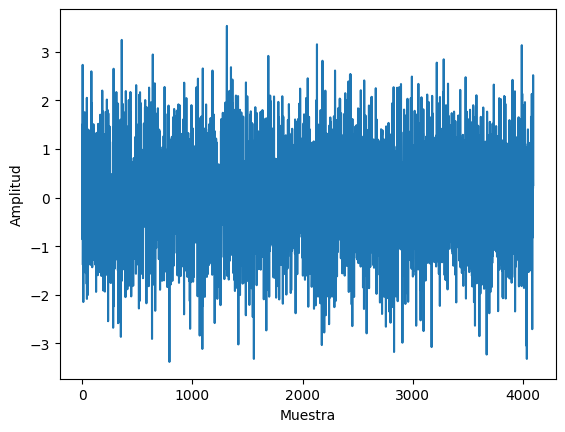

In [ ]:
#Ruido blanco 
media = 0
varianza = 1
N = 4096
Fdisc=N/4 # FRECUENCIA DE MUESTREO
Tdisc=1/Fdisc
t= np.arange(0,4,Tdisc)
Ruido_blanco= np.random.normal(media, varianza, size=len(t))

plt.plot(Ruido_blanco)
plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.show()

In [ ]:
Autocorrelacion_entrada=np.correlate(Ruido_blanco,Ruido_blanco,mode="same") ## GENERAMOS LA AUTOCORRELACION

#Funcion de correlacion normal
#plt.plot(Autocorrelacion_entrada)
#plt.show()

#Funcion de correlacion centrada en 0
#x = np.arange(-N//2+1, N//2+1)
#plt.plot(x, Autocorrelacion_entrada)
#plt.show()


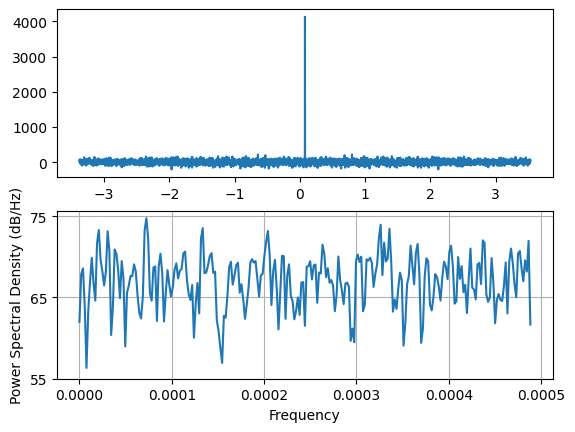

In [ ]:
#Espectro de densidad de potencia de la entrada
ax = np.linspace(np.min(Ruido_blanco), np.max(Ruido_blanco), 4096)
plt.subplot(211)
plt.plot(ax, Autocorrelacion_entrada) #Graficamos la funcion de autocorrelación
plt.subplot(212)
plt.psd(Autocorrelacion_entrada, 512, Tdisc) #Graficamos la densidad espectral
 
plt.show()

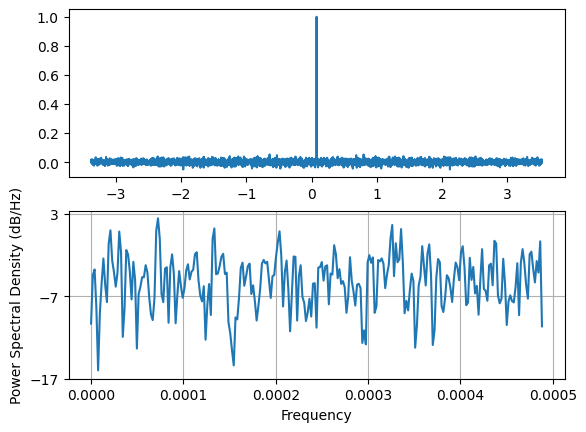

In [ ]:
Autocorrelacion_entradaNormalizada=Autocorrelacion_entrada/Autocorrelacion_entrada.max() ## GENERAMOS LA AUTOCORRELACION normalizada a la entrada
#Espectro de densidad de potencia de la entrada
ax = np.linspace(np.min(Ruido_blanco), np.max(Ruido_blanco), 4096)

plt.subplot(211)
plt.plot(ax, Autocorrelacion_entradaNormalizada) #Graficamos la funcion de autocorrelación
plt.subplot(212)
plt.psd(Autocorrelacion_entradaNormalizada, 512, Tdisc) #Graficamos la densidad espectral
 
plt.show()

In [ ]:
#Salida del circuito con el ruido blanco gaussiano
Fdisc=Nsample/4 # FRECUENCIA DE MUESTREO
Tdisc=1/Fdisc
t=np.arange(0,4,Tdisc)
_,Output_Circuit,_=lti_system.output(Ruido_blanco, t) ##SALIDA DEL CIRCUITO.
plt.plot(t, Ruido_blanco)
plt.plot(t,Output_Circuit)

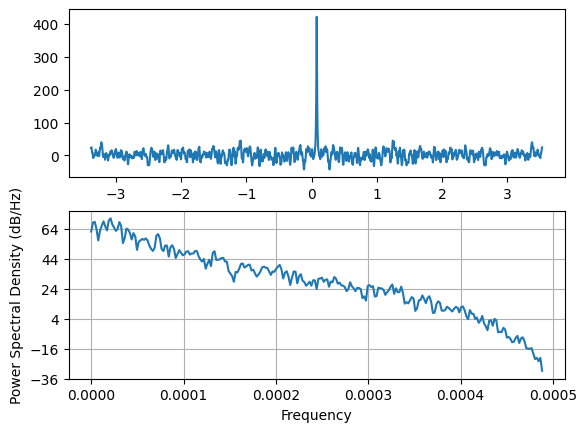

In [ ]:
Autocorrelacion_Output2=np.correlate(Output_Circuit,Output_Circuit,mode="same") 
ax = np.linspace(np.min(Ruido_blanco), np.max(Ruido_blanco), 4096)
plt.subplot(211)
plt.plot(ax, Autocorrelacion_Output2) #Graficamos la funcion de autocorrelación
plt.subplot(212)
plt.psd(Autocorrelacion_Output2, 512, Tdisc) #Graficamos la densidad espectral
 
plt.show()


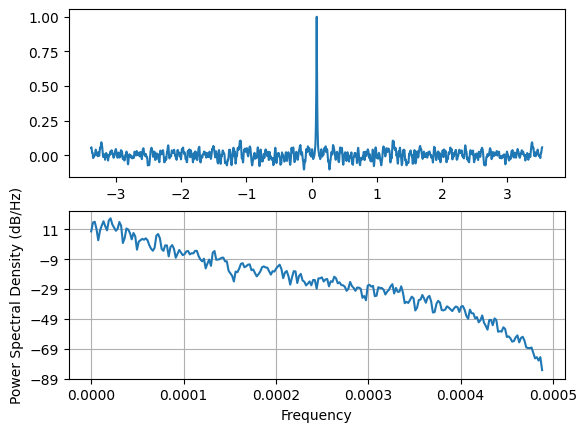

In [ ]:
Autocorrelacion_Normalizacion=Autocorrelacion_Output2/Autocorrelacion_Output2.max()
ax = np.linspace(np.min(Ruido_blanco), np.max(Ruido_blanco), 4096)
plt.subplot(211)
plt.plot(ax, Autocorrelacion_Normalizacion) #Graficamos la funcion de autocorrelación
plt.subplot(212)
plt.psd(Autocorrelacion_Normalizacion, 512, Tdisc) #Graficamos la densidad espectral
 
plt.show()

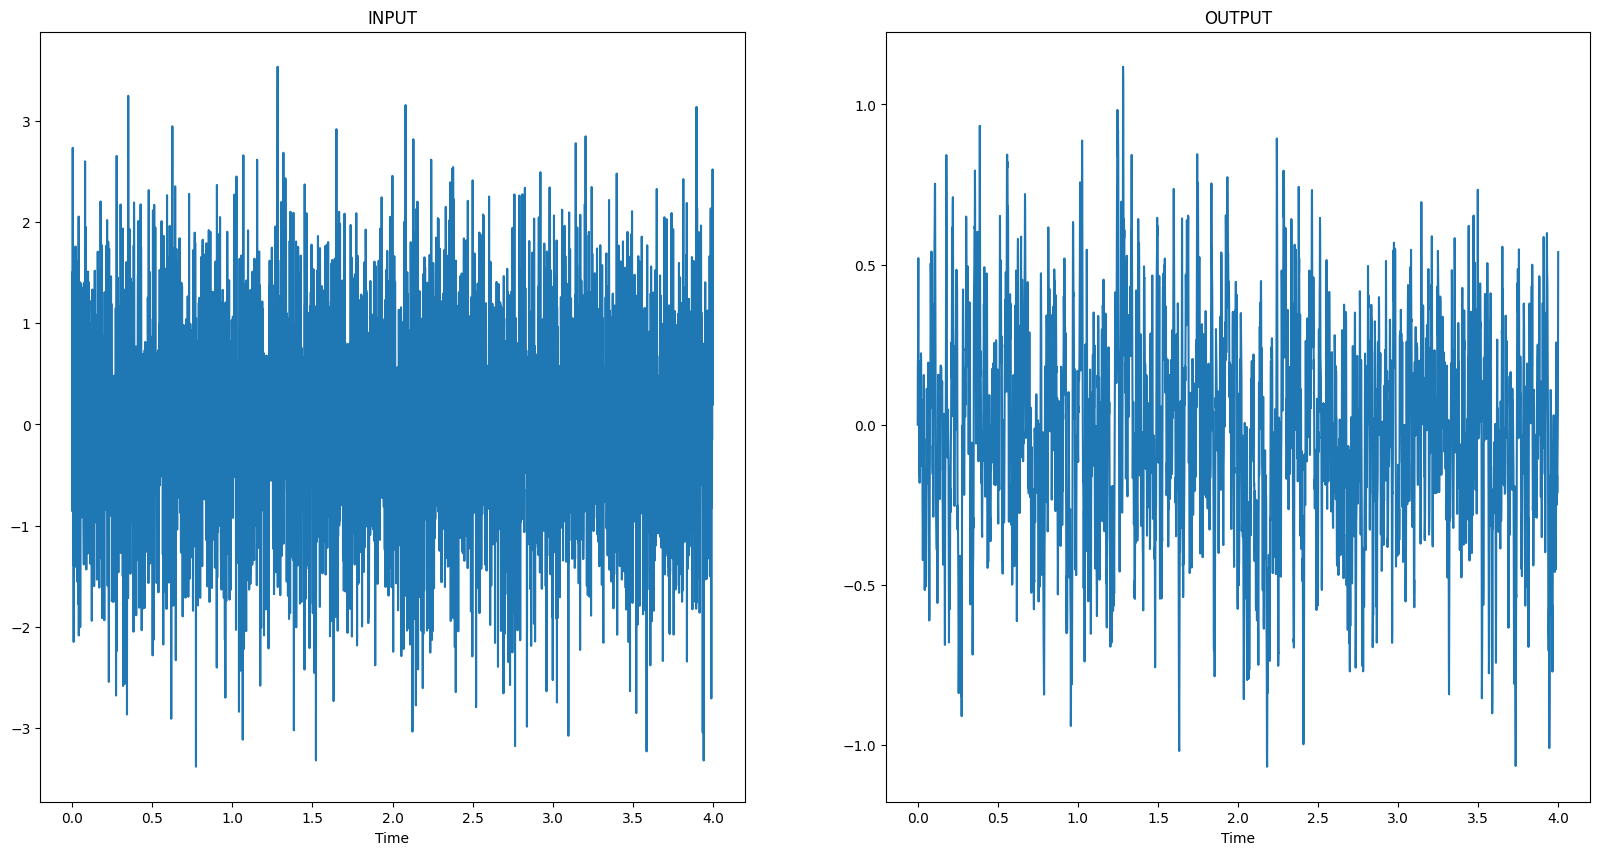

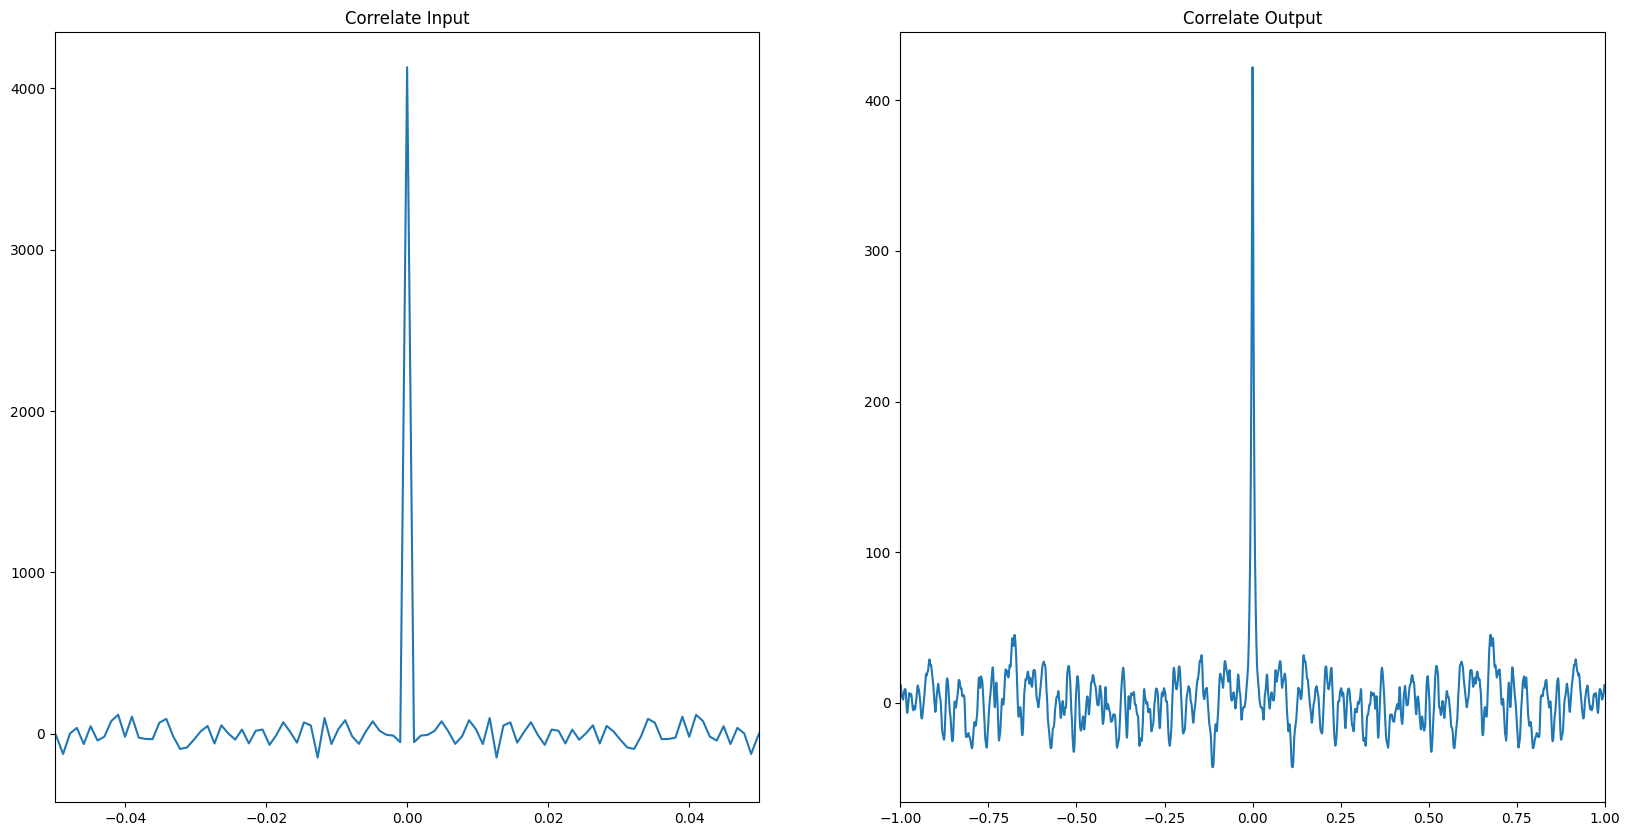

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t, Ruido_blanco)
axs[0].set_title("INPUT")
axs[0].set_xlabel("Time")
axs[1].plot(t, Output_Circuit)
axs[1].set_title("OUTPUT")
axs[1].set_xlabel("Time")




fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t-2,Autocorrelacion_entrada)
axs[0].set_title("Correlate Input")
axs[0].set_xlim(-0.05,0.05)
axs[1].plot(t-2, Autocorrelacion_Output2)
axs[1].set_title("Correlate Output")
axs[1].set_xlim(-1,1)

# Ruido Blanco Gaussiano mas una señal sinusoide 

In [ ]:
N = 4096
Fdisc=N/4 # FRECUENCIA DE MUESTREO
Tdisc=1/Fdisc
t1= np.arange(0,4,Tdisc)

# Parámetros de la señal aleatoria
duracion = 10  # en segundos

noise1 = np.random.normal(0, 1, N)


In [ ]:
# Parámetros de la señal senoidal

amplitud = 1
frecuencia = 10 # Número de ciclos por unidad de tiempo
fase = np.pi / 2  # Fase inicial en radianes

# Parámetros de la ventana de Hamming
#N = len(t1)  # Número total de muestras

# Generar la señal senoidal
seno = amplitud * np.sin(2 * np.pi * frecuencia * t1 + fase)

señalFinal=seno+noise1

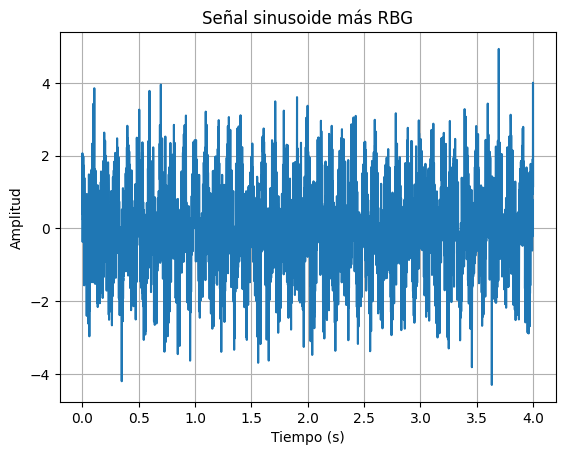

In [ ]:
# Visualizar la señal final
plt.plot(t1, señalFinal)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal sinusoide más RBG')
plt.grid(True)
plt.show()
     

Función de correlación del Ruido Blanco Gaussiano

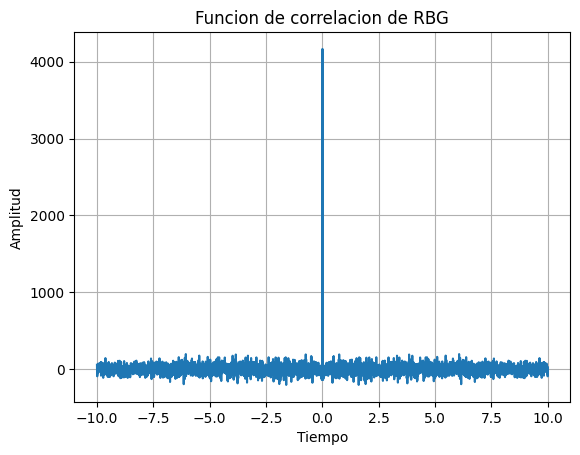

In [ ]:
Autocorrelacion_RBG=np.correlate(noise1,noise1,mode="same")

# Vector de tiempo para la autocorrelación
t_autocorr = np.linspace(-duracion, duracion, N)
plt.plot(t_autocorr , Autocorrelacion_RBG)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Funcion de correlacion de RBG')
plt.grid(True)
plt.show()

Función de correlación de la señal sinusoide

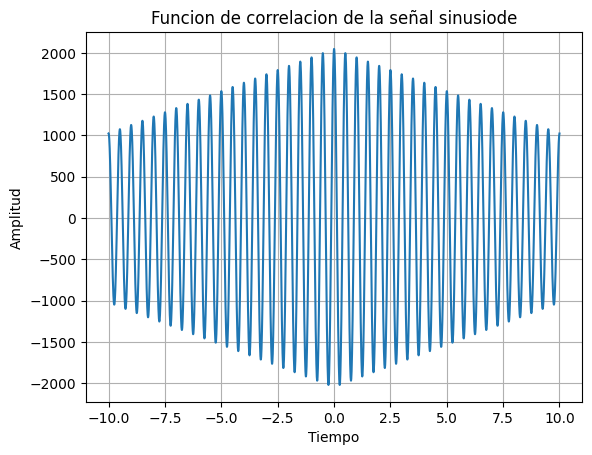

In [ ]:
Autocorrelacion_seno=np.correlate(seno,seno,mode="same")

# Vector de tiempo para la autocorrelación
t_autocorr = np.linspace(-duracion, duracion, N)
plt.plot(t_autocorr , Autocorrelacion_seno)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Funcion de correlacion de la señal sinusiode')
plt.grid(True)
plt.show()

Función de correlación, aplicando ventaneo

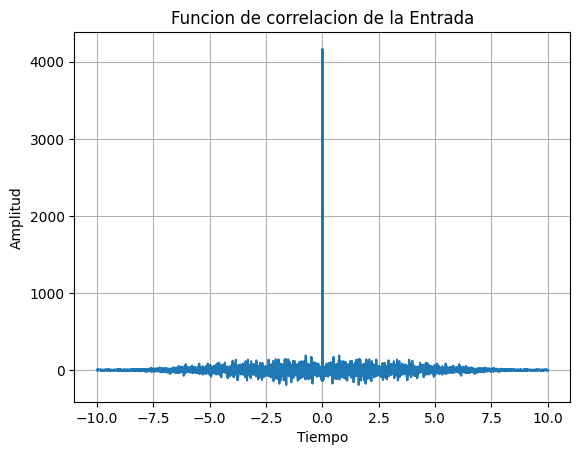

In [ ]:

# Generar la ventana de Hamming solo para la señal de correlación
ventana_hamming = 0.54 - 0.46 * np.cos((2 * np.pi * np.arange(N)) / (N - 1))

# Aplicar la ventana de Hamming solo a la señal de correlación
señal_correlacion_ventaneada = Autocorrelacion_RBG * ventana_hamming

# Sumar la señal senoidal y la señal de correlación ventaneada
señal_generada = seno + señal_correlacion_ventaneada

# Graficar la señal generada

plt.plot(t_autocorr, señal_generada)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Funcion de correlacion de la Entrada')
plt.grid(True)
plt.show()

Autocorrelación Normalizada

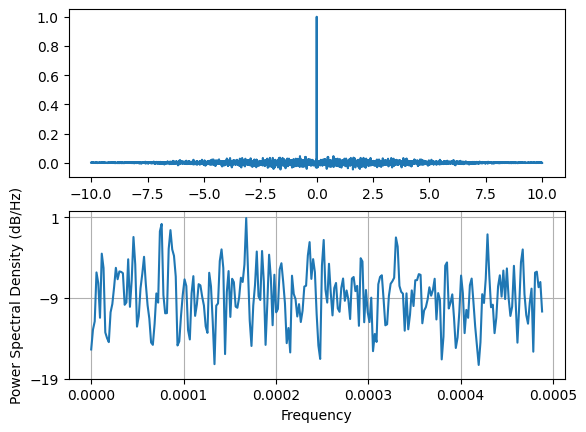

In [ ]:
senal_generada_normalizada=señal_generada/señal_generada.max()
ax = np.linspace(-np.min(señal_generada), np.max(señal_generada), N)
plt.subplot(211)
plt.plot(t_autocorr, senal_generada_normalizada) #Graficamos la funcion de autocorrelación
plt.subplot(212)
plt.psd(senal_generada_normalizada, 512, Tdisc) #Graficamos la densidad espectral
 
plt.show()

Función de correlación de la salida

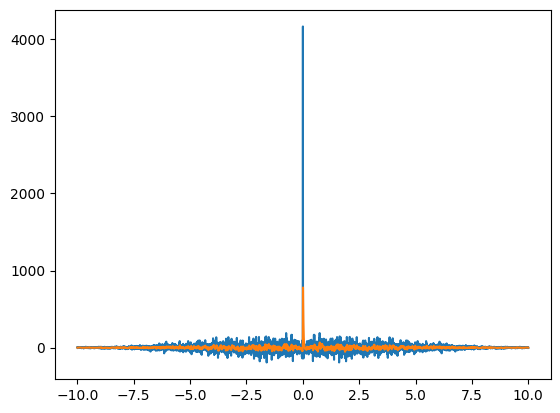

In [ ]:
#Salida del circuito con el ruido blanco gaussiano
Fdisc=Nsample/4 # FRECUENCIA DE MUESTREO
Tdisc=1/Fdisc
t=np.arange(0,4,Tdisc)
_,Output_Circuit,_=lti_system.output(señal_generada, t) ##SALIDA DEL CIRCUITO.
plt.plot(t_autocorr, señal_generada)
plt.plot(t_autocorr,Output_Circuit)

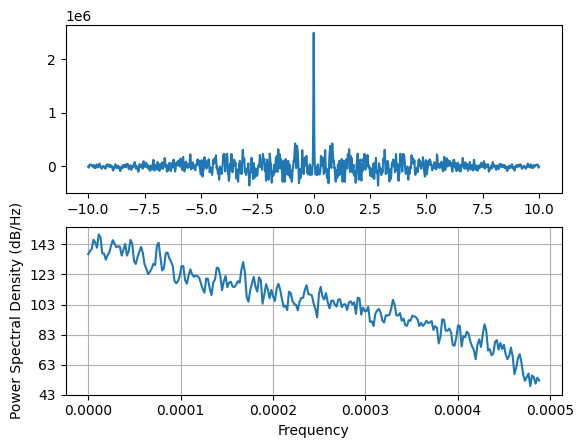

In [ ]:
Autocorrelacion_salida=np.correlate(Output_Circuit,Output_Circuit,mode="same") 
ax = np.linspace(np.min(señal_generada), np.max(señal_generada), 4096)
plt.subplot(211)

plt.plot(t_autocorr, Autocorrelacion_salida) #Graficamos la funcion de autocorrelación
plt.subplot(212)
plt.psd(Autocorrelacion_salida, 512, Tdisc) #Graficamos la densidad espectral
 
plt.show()


Normalizacion

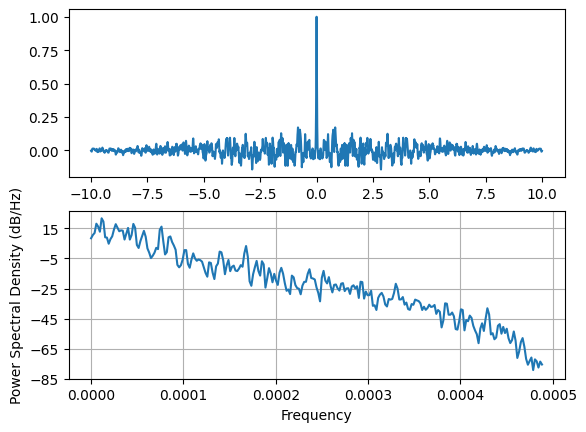

In [ ]:
señal_salida_normalizada=Autocorrelacion_salida/Autocorrelacion_salida.max()
ax = np.linspace(np.min(Autocorrelacion_salida), np.max(Autocorrelacion_salida), N)
plt.subplot(211)
plt.plot(t_autocorr, señal_salida_normalizada) #Graficamos la funcion de autocorrelación
plt.subplot(212)
plt.psd(señal_salida_normalizada, 512, Tdisc) #Graficamos la densidad espectral
 
plt.show()

# Parte 5. Redes Neuronales

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


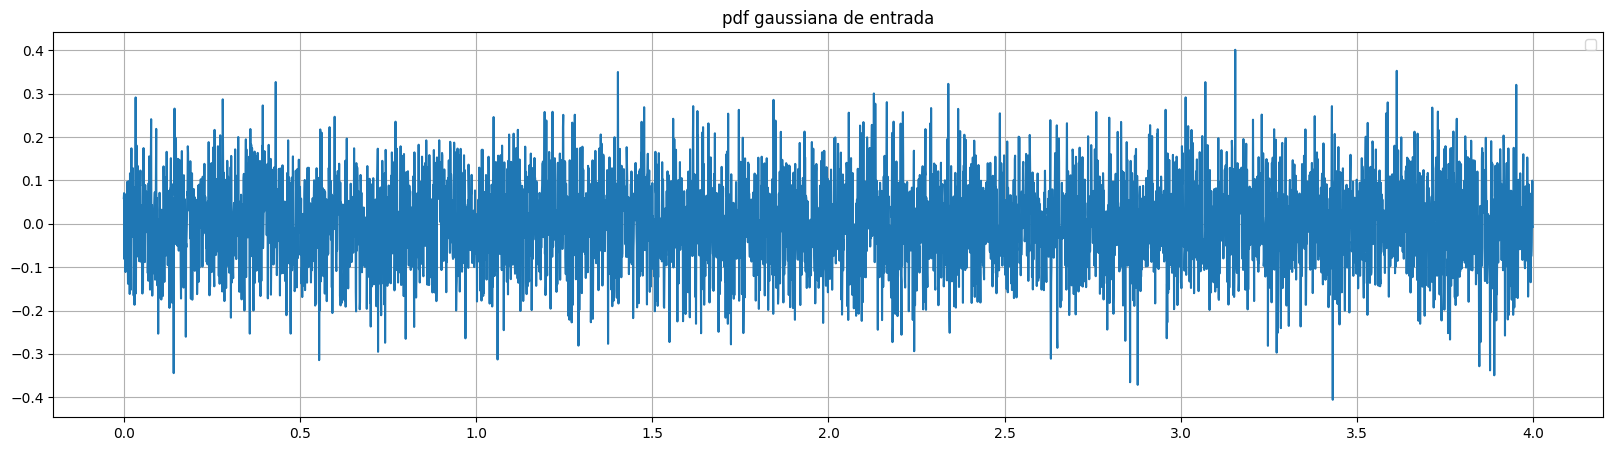

In [ ]:
#Generando la pdf gaussiana de entrada:
media=0
sd=0.1
Fdisc=62.5*20
Tdisc=1/Fdisc
size=5000
input_gaussiana=np.random.normal(media,sd,size)
t1=np.arange(0,4,Tdisc)
#Graficando la pdf gaussiana de entrada:
plt.figure(figsize=(20,5))
plt.plot(t1,input_gaussiana)
plt.title("pdf gaussiana de entrada")
plt.grid()
plt.legend()


In [ ]:
#Salida del circuito

_,output_pdf,_=lti_system.output(input_gaussiana, t1) ##SALIDA DEL CIRCUITO.
#Autocorrelacion de la salida
Autocorrelacion_Output_pdf=np.correlate(output_pdf,output_pdf,mode="same") ## GENERAMOS LA AUTOCORRELACION


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(output_pdf, input_gaussiana)
print("mse:", mse)

mse: 0.009133605455808934


In [ ]:
### IMPORTAMOS LA LIBRERIA Sk-learn ## PARA MANEJO DE DATOS DE TESTEO.
from sklearn.model_selection import KFold, cross_val_score, train_test_split


from keras import Sequential
from keras import optimizers
#from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential,Model
from keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization,CuDNNLSTM, GRU, CuDNNGRU, Embedding, GlobalMaxPooling1D, GlobalAveragePooling1D, Flatten
from keras import backend as K
#from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

2023-06-02 19:59:52.605293: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 19:59:52.959886: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-02 19:59:52.959933: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-02 19:59:53.098190: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-02 19:59:57.481930: W tensorflow/stream_executor/pla

In [ ]:
import tensorflow as tf 
from tensorflow.keras.layers import Dropout,Dense,BatchNormalization,Embedding,LSTM ### IMPORTAMOS LA CAPA DENSA Y DROPOUT PARA EVITAR EL OVERFITTING
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping ## IMPORTAMOS LOS CALLBACKS PARA OBTENER LOS MEJORES 
## RENDIMIENTOS DE APRENDIZAJE Y NO DESGASTAR EL SISTEMA.
from tensorflow.keras import models,optimizers,regularizers ## IMPORTAMOS LOS OPTIMIZADORES Y REGULARIZERS PARA EVITAR
## EL OVERFITTING.
from tensorflow.keras.models import Sequential ## PARA LAS CAPAS DENSAS

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(input_gaussiana, output_pdf)

In [ ]:
### OBSERVEMOS EL TAMAÑO DE LOS DATOS DE TESTEO
print(X_train.shape)
print(X_test.shape)

(3750,)
(1250,)


In [ ]:
## POR BUENAS PRACTICAS VAMOS A GENERAR UN SET DE VALIDACIÓN PARA COMPROBAR OVERFITTING
## APARTIR DEL SET DE VALIDACIÓN

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

print(X_train.shape)
print(X_val.shape)
#Copiamos las particiones en otras variables

(2812,)
(938,)


In [ ]:
### NORMALIZAMOS LOS DATOS PARA TENER UNA MISMA DISTRIBUCIÓN PARA TODOS.
mean=X_train.mean(axis=0)
X_train=X_train-mean
std=X_train.std(axis=0)
X_train=X_train/(std**2)

#print(X_train.shape)

## HACEMOS LO MISMO CON LOS DATOS DE TESTEO Y VAL
## PERO TENIENDO EN CUENTA LA MEDIA Y VARIANZA DE LOS DATOS DE TRAIN PUESTO QUE LOS DE TEST Y VAL EN TEORIA NO LOS TENGO.


X_test=X_test-mean
X_test=X_test/(std**2)

X_val=X_val-mean
X_val=X_val/(std**2)

In [ ]:
### ORGANIZAMOS LOS DATOS DE TESTEO 
X_train=X_train.reshape(len(X_train),1) ### LO GENERAMOS COMO UN TENSOR PARA QUE SEA MAS FACIL RECONOCERLO.
X_test=X_test.reshape(len(X_test),1)
X_val=X_val.reshape(len(X_val),1)

y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)
y_val=y_val.reshape(len(y_val),1)

print(X_train.shape)
print(y_train.shape)

(2812, 1)
(2812, 1)


In [ ]:
###### GENERAMOS EL MODELO
modelo=models.Sequential()
#### CARGAMOS LAS CAPAS
modelo.add(Dense(20,activation="relu",input_shape=(1,1))) ## SIEMPRE MIRAR LA SEGUNDA DIMENSION
modelo.add(Dropout(0.8))
modelo.add(Dense(20,activation="relu")) ## SIEMPRE MIRAR LA SEGUNDA DIMENSION
modelo.add(Dense(20,activation="relu",kernel_regularizer=regularizers.l1(0.001))) ## SIEMPRE MIRAR LA SEGUNDA DIMENSION
modelo.add(Dense(20,activation="relu",kernel_regularizer=regularizers.l2(0.001)))
modelo.add(Dense(1)) ## COMO ES LINEAL LA SALIDA NO NECESITO PONERLE UNA CAPA DE ACTIVACIÓN

2023-06-02 20:00:07.161744: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-02 20:00:07.161786: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-02 20:00:07.161810: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-671a449e-be09-4113-bc97-6b850ce0e6ee): /proc/driver/nvidia/version does not exist
2023-06-02 20:00:07.162207: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 20)             40        
                                                                 
 dropout (Dropout)           (None, 1, 20)             0         
                                                                 
 dense_1 (Dense)             (None, 1, 20)             420       
                                                                 
 dense_2 (Dense)             (None, 1, 20)             420       
                                                                 
 dense_3 (Dense)             (None, 1, 20)             420       
                                                                 
 dense_4 (Dense)             (None, 1, 1)              21        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainabl

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50)

In [ ]:
#### COMPILAMOS EL MODELO 
modelo.compile(optimizer=optimizers.RMSprop(lr=0.01),loss="mae",)

/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
### GENERAMOS EL ENTRENAMIENTO 

history=modelo.fit(X_train,
         y_train,
         batch_size=4
         ,validation_data=(X_val,y_val),
         callbacks=[early],
         epochs=50)

Epoch 1/50
703/703 [==============================] - 8s 8ms/step - loss: 0.0693 - val_loss: 0.0313
Epoch 2/50
703/703 [==============================] - 5s 7ms/step - loss: 0.0276 - val_loss: 0.0283
Epoch 3/50
703/703 [==============================] - 4s 6ms/step - loss: 0.0275 - val_loss: 0.0300
Epoch 4/50
703/703 [==============================] - 5s 8ms/step - loss: 0.0275 - val_loss: 0.0258
Epoch 5/50
703/703 [==============================] - 4s 6ms/step - loss: 0.0277 - val_loss: 0.0311
Epoch 6/50
703/703 [==============================] - 5s 7ms/step - loss: 0.0276 - val_loss: 0.0258
Epoch 7/50
703/703 [==============================] - 4s 6ms/step - loss: 0.0276 - val_loss: 0.0259
Epoch 8/50
703/703 [==============================] - 5s 7ms/step - loss: 0.0278 - val_loss: 0.0260
Epoch 9/50
703/703 [==============================] - 4s 6ms/step - loss: 0.0275 - val_loss: 0.0274
Epoch 10/50
703/703 [==============================] - 5s 7ms/step - loss: 0.0275 - val_loss: 0.0260

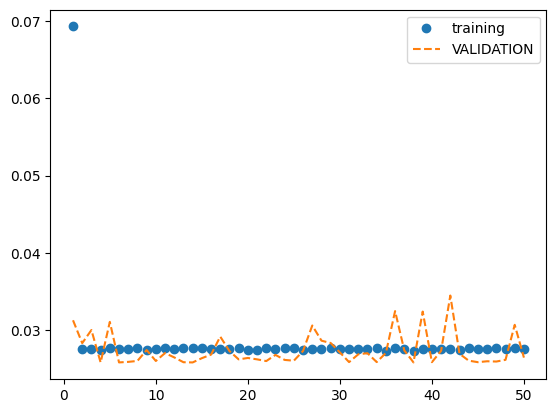

In [ ]:
history_dict=history.history
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]
epoch=range(1,len(loss_values)+1)
plt.plot(epoch,loss_values,"o",label="training")

plt.plot(epoch,val_loss_values,"--",label="VALIDATION")
plt.legend()
plt.show()

In [ ]:
modelo.evaluate(X_test, y_test)

40/40 [==============================] - 0s 3ms/step - loss: 0.0267


In [ ]:
!pip install statsmodels
import statsmodels.api as sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 14.8 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
def Solucion(var):
    Gaussian=np.random.normal(1/np.pi,var,4096)
    _,Result_Circuit,_=lti_system.output(Gaussian, t)
    Result_Red=np.array(modelo.predict(X_train)).reshape(2812)
    Result_Circuit=np.correlate(Result_Circuit,Result_Circuit,mode="same")
    Salida_circuito=[]
    Salida_Redes=[]
    for i in range(2812):
            Salida_circuito.append(Result_Circuit[i])
            Salida_Redes.append(Result_Red[i])
    lr_model = sm.OLS(Salida_Redes,Salida_circuito)
    results = lr_model.fit() 
    return results.rsquared
  
# We double all numbers using map()
var=np.arange(0.1,31.1,1)
dict={}
arreglo=[]
for i in range(0,len(var)):
    dict[var[i]]=[Solucion(var[i])]
    arreglo.append(Solucion(var[i]))

88/88 [==============================] - 1s 5ms/step


In [ ]:
import pandas as pd


arreglo2=pd.DataFrame.from_dict(dict)
arreglo2

,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,...,21.1,22.1,23.1,24.1,25.1,26.1,27.1,28.1,29.1,30.1
0,0.967747,0.951148,0.859691,0.795073,0.542345,0.325915,0.45644,0.124249,0.019515,0.024746,...,0.002457,0.000293,0.003147,0.00072,0.000014,0.006398,0.00118,0.005379,0.008004,0.005751


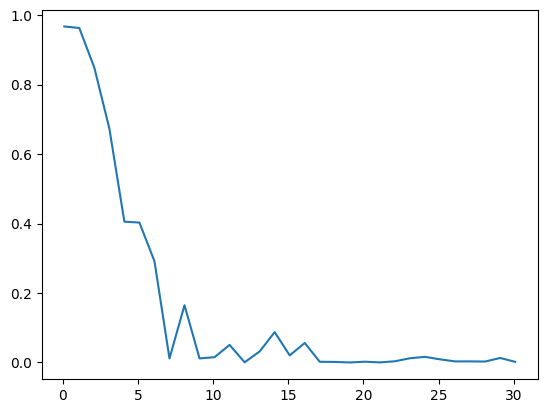

In [ ]:
varrr = var.copy()
arreglooo = arreglo.copy()
plt.plot(varrr,arreglooo)

In [ ]:
## ANALICEMOS CON EL LOS DATOS DE TESTEO 

modelo.evaluate(X_test, y_test)

40/40 [==============================] - 0s 6ms/step - loss: 0.0267


In [ ]:
len(output_pdf)

In [ ]:
i = 0
list = []
while (i<1024):
    l2 = X_test[i]-y_test[i]
    list.append(l2)
    i = i+1

L2 = ((sum(list))**2)/2812
#print(list)
print("Error L2:",L2)

Error L2: [4.22079343]


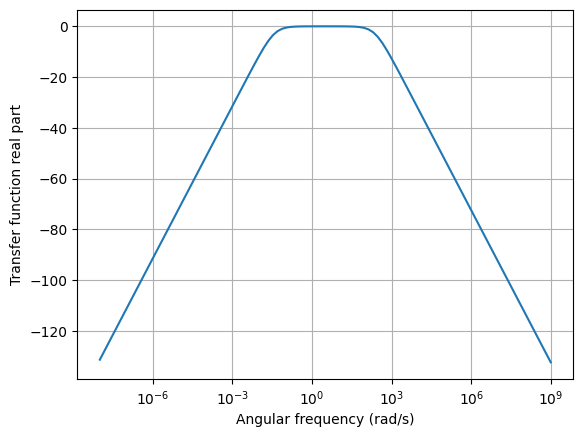

In [ ]:
#Le asignamos valores a los componentes
C1=44.7e-1
C2=0.007e-1
R1=6
R2=6
#escribimos los valores del numerador y denominador de la FT
Coeficientes_num=[C1*R1,0]
Coeficientes_dem=[C1*C2*R2*R1,C1*R1+C2*R1+C2*R2,1]
#Reemplazamos los componentes con los valores ya asignados
H_valores=H.subs("C1",C1).subs("C2",C2).subs("R1",R1).subs("R2",R2)
#Graficamos la funcion de transferencia (pasabandas)
W=logspace(-8,9,100)##Generamos vector de frecuencias 
X=H_valores(j*omega).dB.plot(W,log_frequency=True) #graficar la magnitud en db de la ft

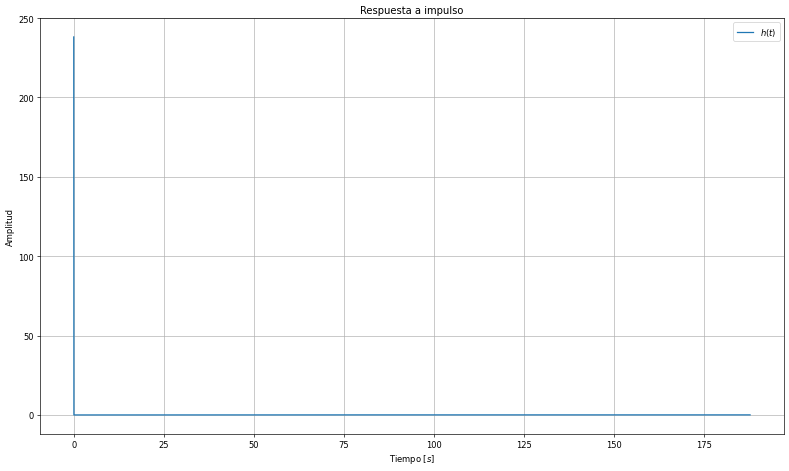

In [ ]:
## AHORA ANALIZANDO LA RESPUESTA AL IMPULSO DEL SISTEMA, Y ASIGNANDO LOS VALORES AL MODELADO DEL CIRCUITO:
##OBSERVAMOS LA RESPUESTA AL IMPULSO:

lti_system = lti(Coeficientes_num, Coeficientes_dem)   #LTI
Nsample=4096 ## CANTIDAD DE MUESTRAS
t, h = lti_system.impulse(N=Nsample) # sistema LTI exitado con la función impulso
## NOS DEVUELVE 

plt.figure(figsize=(16, 9), dpi=60)
plt.plot(t, h, label='$h(t)$')

plt.grid(True)
plt.legend()
plt.title("Respuesta a impulso")
plt.xlabel("Tiempo [$s$]")
plt.ylabel("Amplitud")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


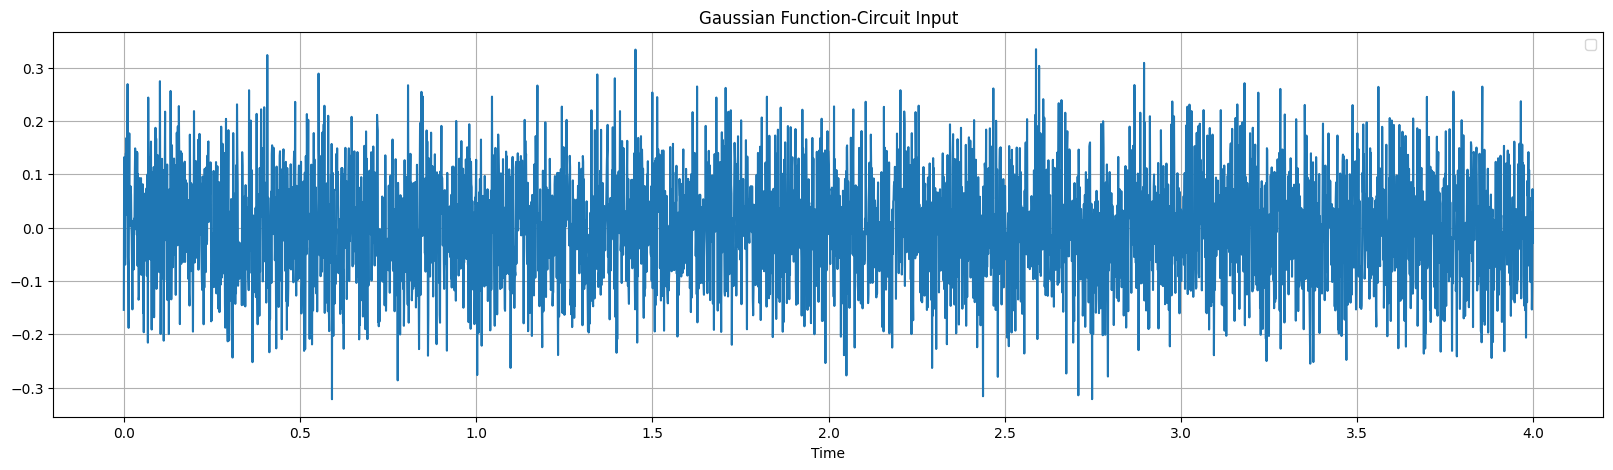

<Figure size 2000x500 with 0 Axes>

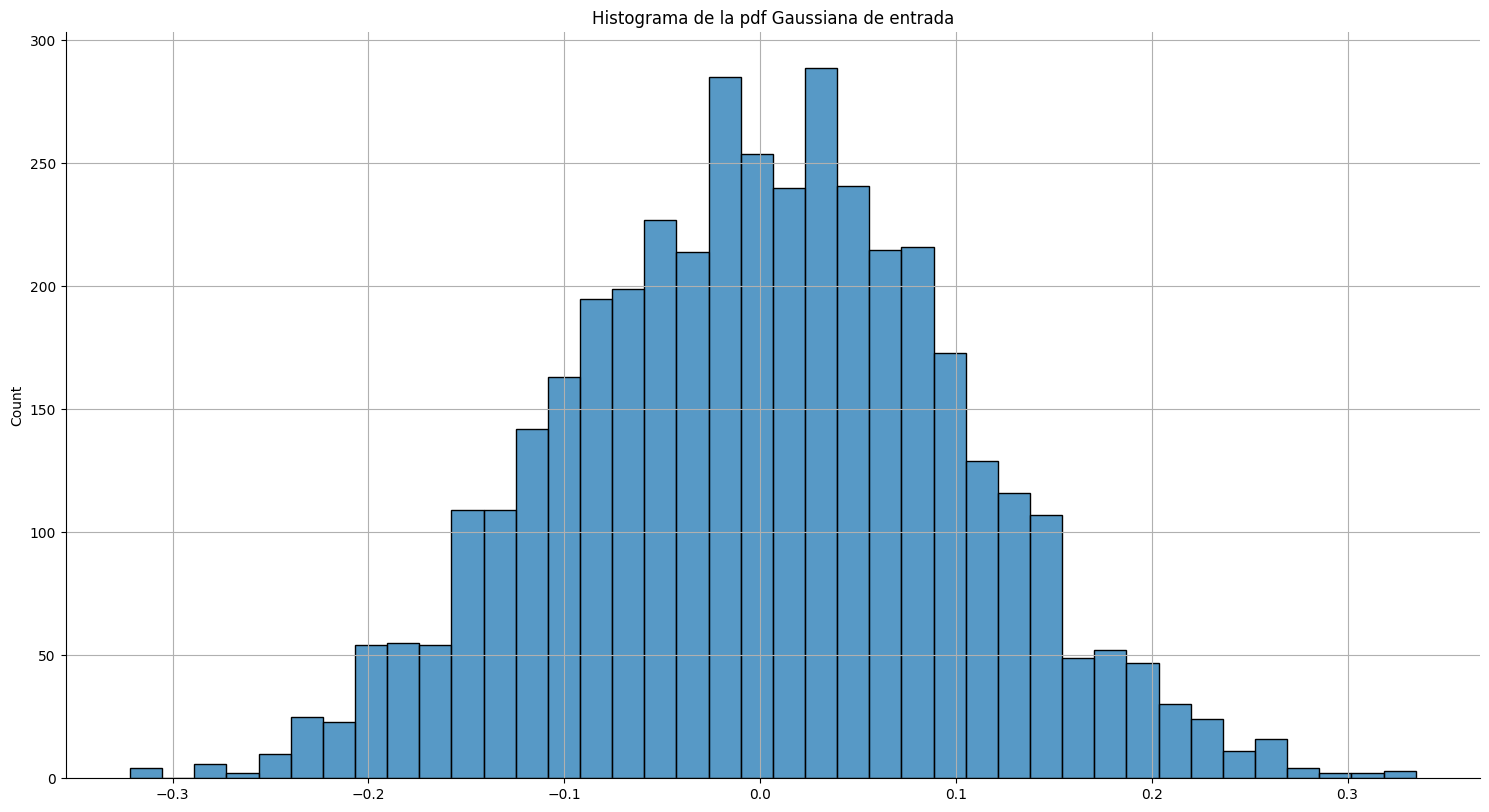

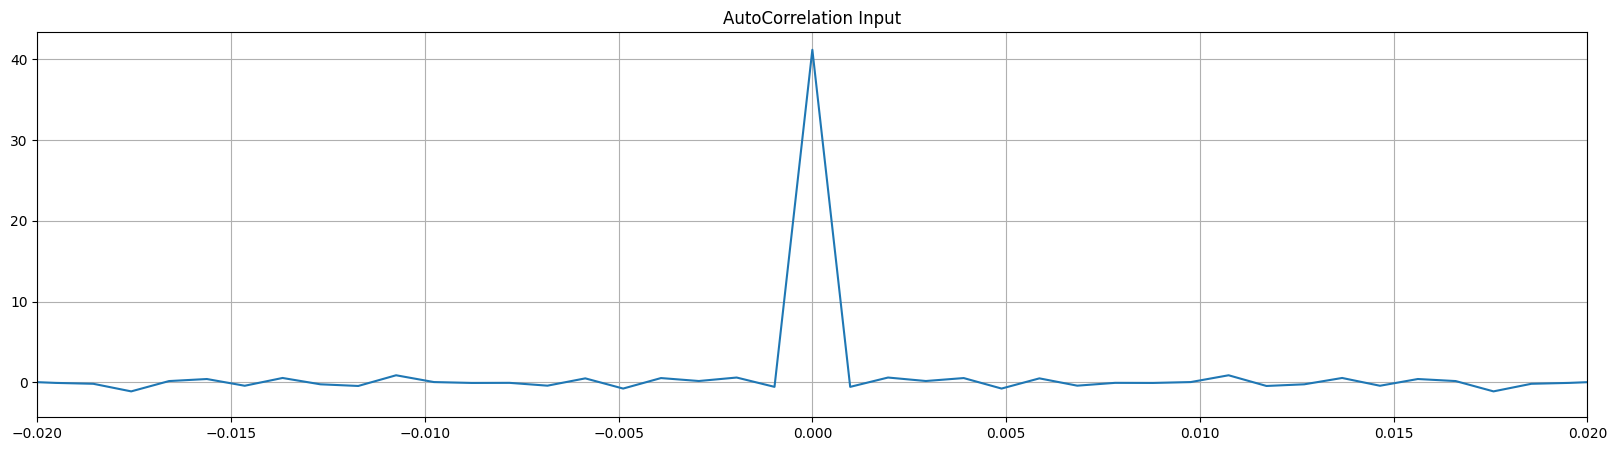

In [ ]:
## GENERAMOS LA ENTRADA DE NUESTRO CIRCUITO:

Nbins=int((1+3.322*np.log2(Nsample)))### NUMERO DE BINS PARA EL HISTOGRAMA
Fdisc=Nsample/4 # FRECUENCIA DE MUESTREO
Tdisc=1/Fdisc
t=np.arange(0,4,Tdisc) ## GENERAMOS VECTOR DE TIEMPO PARA NUESTRA FUNCIÓN ALEATORIA

#λ= np.pi     
#expt= expon.rvs(loc=0,scale=1/λ,size=Nsample,random_state=None)

### GENERAMOS UN RUIDO GAUSSIANO
sd=0.1
mean=0
input_gaussiana=np.random.normal(mean,sd,len(t)) 


Autocorrelacion_Gaussian=np.correlate(input_gaussiana,input_gaussiana,mode="same") ## GENERAMOS LA AUTOCORRELACION

plt.figure(figsize=(20,5))
plt.plot(t,input_gaussiana)
plt.title("Gaussian Function-Circuit Input")
plt.xlabel("Time")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20,5))
sns.displot(input_gaussiana,bins=Nbins,height=8, aspect=15/8)
#sns.set(rc = {'figure.figsize':(20,5)})
hist_kws={"edgecolor":"balck"}
plt.title("Histograma de la pdf Gaussiana de entrada")
plt.grid()
plt.show()

plt.figure(figsize=(20,5))
plt.plot(t-2,Autocorrelacion_Gaussian)
plt.xlim(-0.02,0.02)
hist_kws={"edgecolor":"balck"}
plt.title("AutoCorrelation Input")
plt.grid()
plt.show()

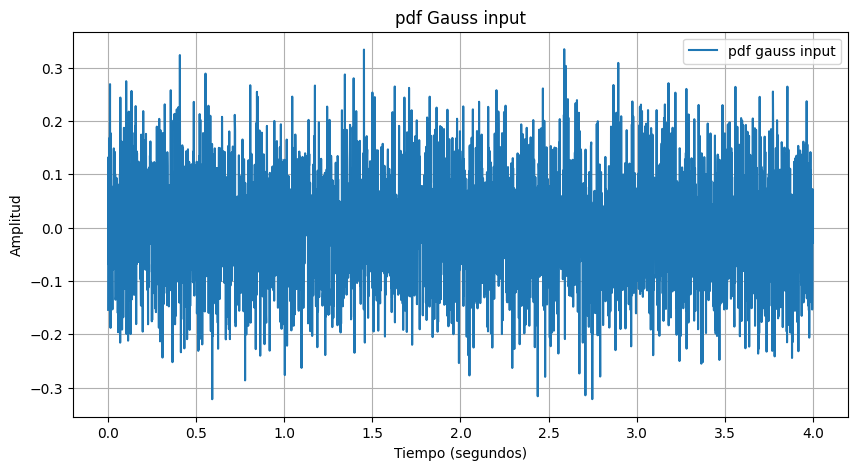

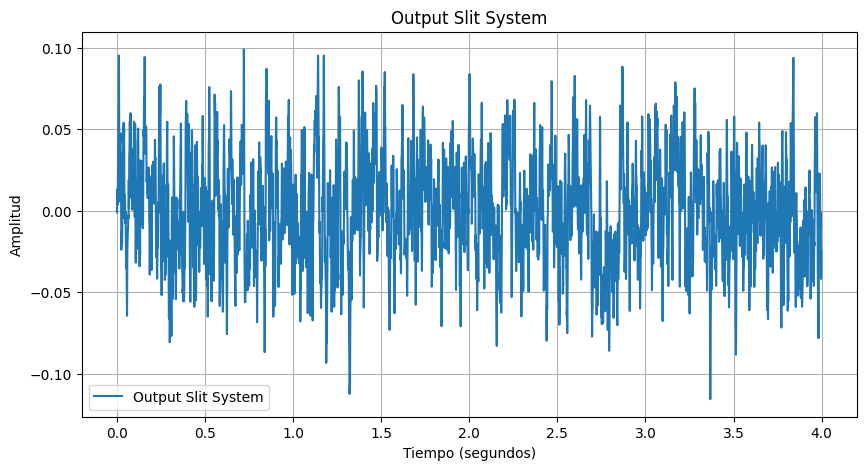

In [ ]:
###INGRESANDO AL SISTEMA SLIT:
#pdf de salida:
_,output_pdf,_=lti_system.output(input_gaussiana, t)
#pdf gaussiana Input
plt.figure(figsize=(10,5))
plt.title("pdf Gauss input")
plt.plot(t, input_gaussiana,label="pdf gauss input")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()
#pdf Output:
plt.figure(figsize=(10,5))
plt.title("Output Slit System")
plt.plot(t, output_pdf,label="Output Slit System")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

In [ ]:
fourier_transform = np.fft.rfft(input_gaussiana)

abs_fourier_transform = np.abs(fourier_transform)

power_spectrum = np.square(abs_fourier_transform)

frequency = np.linspace(0, 60/2, len(power_spectrum))

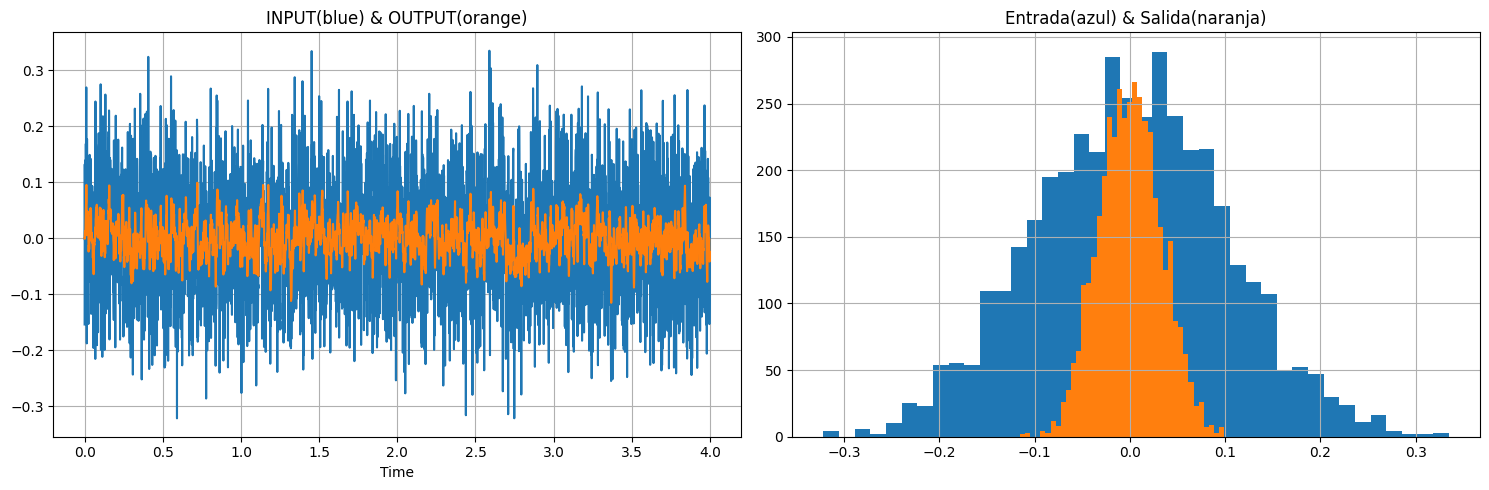

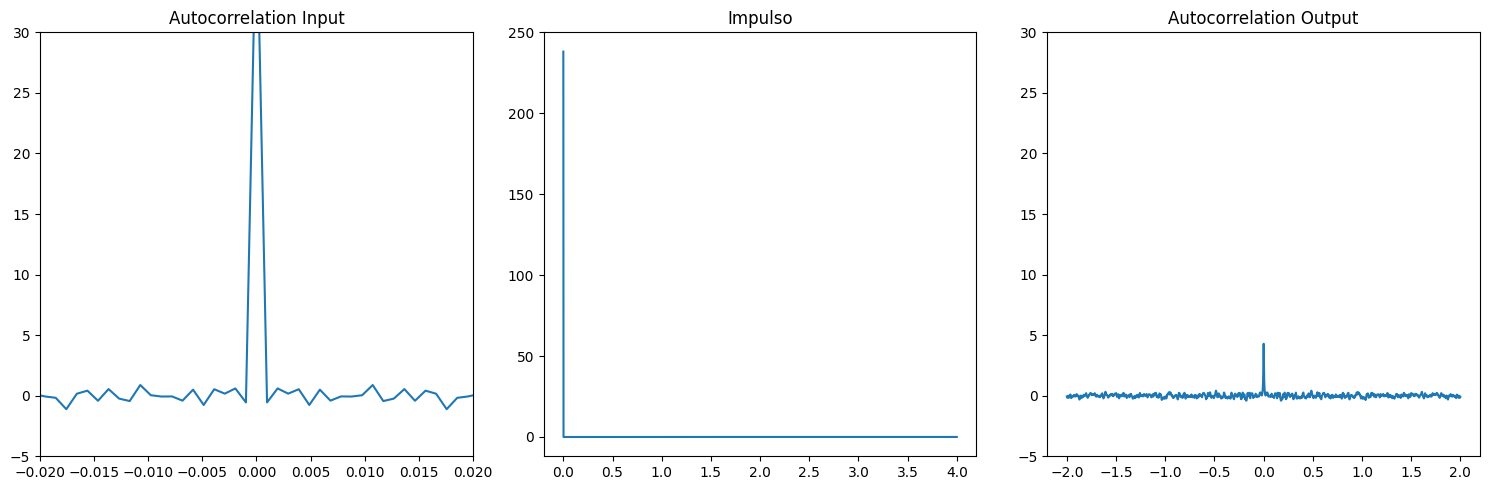

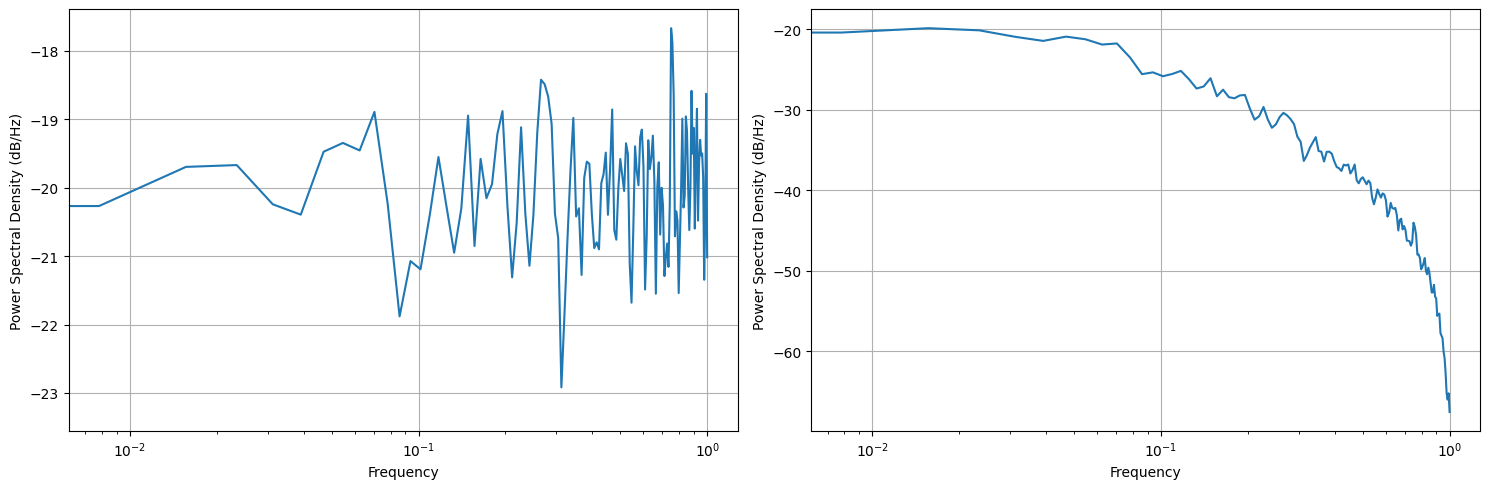

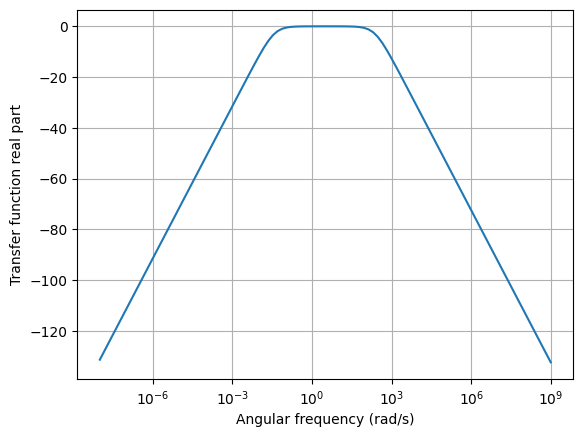

In [ ]:
## INGRESAMOS LA ENTRADA EXPONENCIAL A NUESTRO CIRCUITO:
_,output_pdf,_=lti_system.output(input_gaussiana, t) ##SALIDA DEL CIRCUITO.
Autocorrelacion_Output_pdf=np.correlate(output_pdf,output_pdf,mode="same") ## GENERAMOS LA AUTOCORRELACION
# COMPARAMOS ENTRADA VS SALIDA 

fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(t, input_gaussiana)
axs[0].set_title("INPUT(blue) & OUTPUT(orange)")
axs[0].set_xlabel("Time")
axs[0].plot(t, output_pdf)
axs[0].grid()

axs[1].hist(input_gaussiana,bins=Nbins)


axs[1].hist(output_pdf,bins=Nbins)

axs[1].set_title("Entrada(azul) & Salida(naranja)")
axs[1].grid()

fig.tight_layout()
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].plot(t-2,Autocorrelacion_Gaussian)
axs[0].set_title("Autocorrelation Input")
axs[0].set_xlim(-0.02,0.02)
axs[0].set_ylim(-5,30)
axs[1].plot(t, h, label='$h(t)$')
axs[1].set_title("Impulso")
axs[2].plot(t-2, Autocorrelacion_Output_pdf)
axs[2].set_title("Autocorrelation Output")
#axs[2].set_xlim(-0.02,0.02)
axs[2].set_ylim(-5,30)

#axs[2].set_ylim(-30,30)


fig.tight_layout()

fig, axs = plt.subplots(1, 2, figsize=(15,5))

#POWER SPECTRUM
axs[0].psd(input_gaussiana)
axs[0].semilogx()

axs[1].psd(output_pdf)
axs[1].semilogx()
#axs[1].set_ylim(-25,-18)
X=H_valores(j*omega).dB.plot(W,log_frequency=True)


fourier_transform3 = np.fft.rfft(output_pdf)

abs_fourier_transform3 = np.abs(fourier_transform3)

power_spectrum3 = np.square(abs_fourier_transform3)

frequency3 = np.linspace(0, 60/2, len(power_spectrum3))


#axs[2].plot(frequency, power_spectrum)
#axs[2].plot(frequency3, power_spectrum3)

fig.tight_layout()


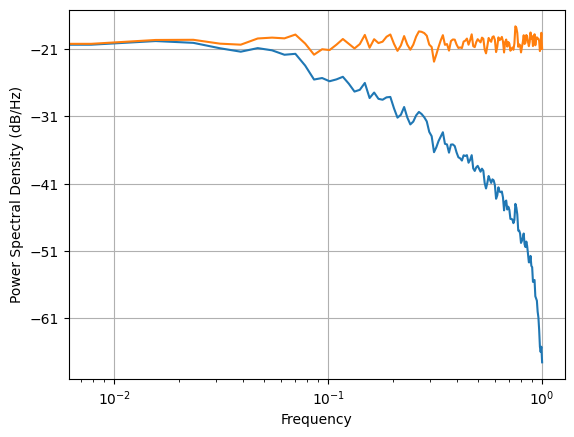

In [ ]:
plt.psd(output_pdf)
plt.psd(input_gaussiana)
plt.semilogx()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input_gaussiana, output_pdf)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

print(X_train.shape)
print(X_val.shape)
#Copiamos las particiones en otras variables
### NORMALIZAMOS LOS DATOS PARA TENER UNA MISMA DISTRIBUCIÓN PARA TODOS.
mean=X_train.mean(axis=0)
X_train=X_train-mean
std=X_train.std(axis=0)
X_train=X_train/(std**2)

#print(X_train.shape)

## HACEMOS LO MISMO CON LOS DATOS DE TESTEO Y VAL
## PERO TENIENDO EN CUENTA LA MEDIA Y VARIANZA DE LOS DATOS DE TRAIN PUESTO QUE LOS DE TEST Y VAL EN TEORIA NO LOS TENGO.


X_test=X_test-mean
X_test=X_test/(std**2)

X_val=X_val-mean
X_val=X_val/(std**2)

(2304,)
(768,)


In [ ]:
### ORGANIZAMOS LOS DATOS DE TESTEO 
X_train=X_train.reshape(len(X_train),1) ### LO GENERAMOS COMO UN TENSOR PARA QUE SEA MAS FACIL RECONOCERLO.
X_test=X_test.reshape(len(X_test),1)
X_val=X_val.reshape(len(X_val),1)

y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)
y_val=y_val.reshape(len(y_val),1)

print(X_train.shape)
print(y_train.shape)

(2304, 1)
(2304, 1)


In [ ]:
###### GENERAMOS EL MODELO
modelo=models.Sequential()
#### CARGAMOS LAS CAPAS
modelo.add(Dense(20,activation="relu",input_shape=(1,1))) ## SIEMPRE MIRAR LA SEGUNDA DIMENSION
modelo.add(Dropout(0.8))
modelo.add(Dense(20,activation="relu")) ## SIEMPRE MIRAR LA SEGUNDA DIMENSION
modelo.add(Dense(20,activation="relu",kernel_regularizer=regularizers.l1(0.001))) ## SIEMPRE MIRAR LA SEGUNDA DIMENSION
modelo.add(Dense(20,activation="relu",kernel_regularizer=regularizers.l2(0.001)))
modelo.add(Dense(1)) ## COMO ES LINEAL LA SALIDA NO NECESITO PONERLE UNA CAPA DE ACTIVACIÓN

In [ ]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1, 20)             40        
                                                                 
 dropout_1 (Dropout)         (None, 1, 20)             0         
                                                                 
 dense_6 (Dense)             (None, 1, 20)             420       
                                                                 
 dense_7 (Dense)             (None, 1, 20)             420       
                                                                 
 dense_8 (Dense)             (None, 1, 20)             420       
                                                                 
 dense_9 (Dense)             (None, 1, 1)              21        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-traina

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
### GENERAMOS EL ENTRENAMIENTO 
#### COMPILAMOS EL MODELO 
modelo.compile(optimizer=optimizers.RMSprop(lr=0.01),loss="mae",)
history=modelo.fit(X_train,
         y_train,
         batch_size=4
         ,validation_data=(X_val,y_val),
         callbacks=[early],
         epochs=50)

/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
Epoch 1/50
576/576 [==============================] - 6s 8ms/step - loss: 0.0787 - val_loss: 0.0278
Epoch 2/50
576/576 [==============================] - 4s 7ms/step - loss: 0.0297 - val_loss: 0.0274
Epoch 3/50
576/576 [==============================] - 4s 7ms/step - loss: 0.0297 - val_loss: 0.0327
Epoch 4/50
576/576 [==============================] - 5s 8ms/step - loss: 0.0295 - val_loss: 0.0279
Epoch 5/50
576/576 [==============================] - 4s 7ms/step - loss: 0.0297 - val_loss: 0.0277
Epoch 6/50
576/576 [==============================] - 4s 7ms/step - loss: 0.0293 - val_loss: 0.0276
Epoch 7/50
576/576 [==============================] - 3s 6ms/step - loss: 0.0297 - val_loss: 0.0289


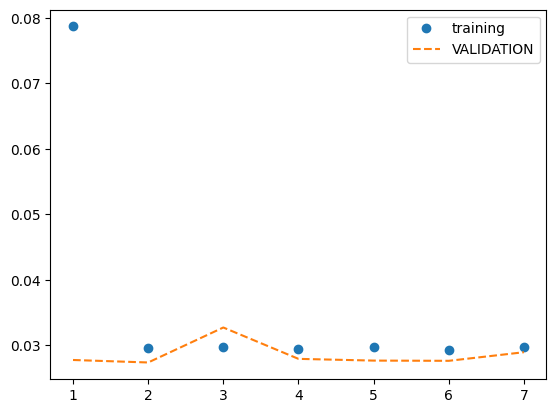

In [ ]:
history_dict=history.history
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]
epoch=range(1,len(loss_values)+1)
plt.plot(epoch,loss_values,"o",label="training")

plt.plot(epoch,val_loss_values,"--",label="VALIDATION")
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm
modelo.evaluate(X_test, y_test)

32/32 [==============================] - 1s 9ms/step - loss: 0.0296


In [ ]:
def Solucion(var):
    input_gaussiana=np.random.normal(1/np.pi,var,4096)
    _,Result_Circuit,_=lti_system.output(input_gaussiana, t)
    Result_Red=np.array(modelo.predict(X_train)).reshape(2304)
    Result_Circuit=np.correlate(Result_Circuit,Result_Circuit,mode="same")
    Salida_circuito=[]
    Salida_Redes=[]
    for i in range(2304):
            Salida_circuito.append(Result_Circuit[i])
            Salida_Redes.append(Result_Red[i])
    lr_model = sm.OLS(Salida_Redes,Salida_circuito)
    results = lr_model.fit() 
    return results.rsquared
  
# We double all numbers using map()
var=np.arange(0.1,31.1,1)
dict={}
arreglo=[]
for i in range(0,len(var)):
    dict[var[i]]=[Solucion(var[i])]
    arreglo.append(Solucion(var[i]))

72/72 [==============================] - 1s 8ms/step


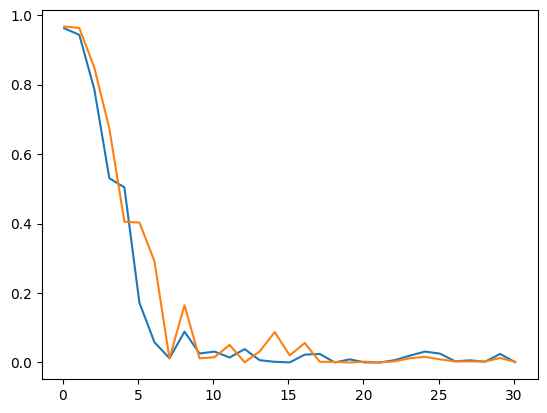

In [ ]:
import pandas as pd


arreglo2=pd.DataFrame.from_dict(dict)
varr = var.copy()
arregloo = arreglo.copy()
plt.plot(var,arreglo)
plt.plot(varrr, arreglooo)

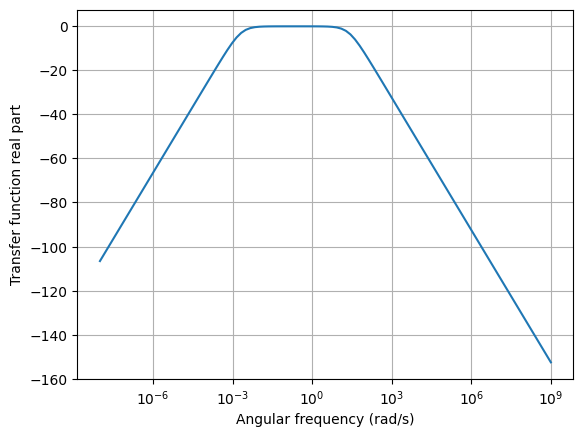

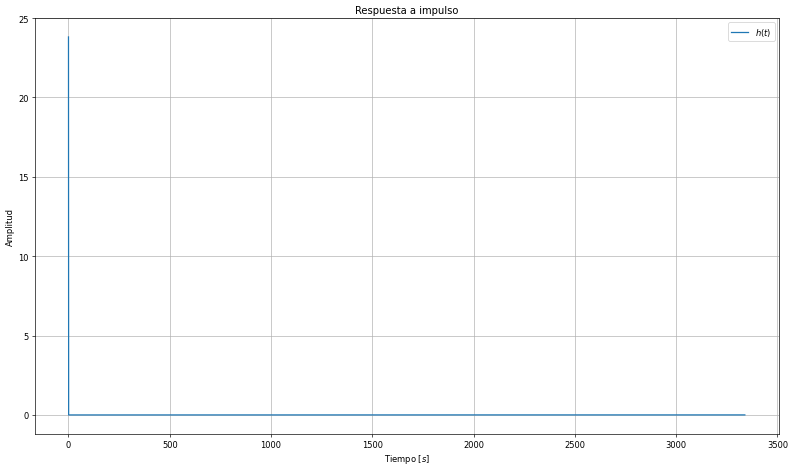

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


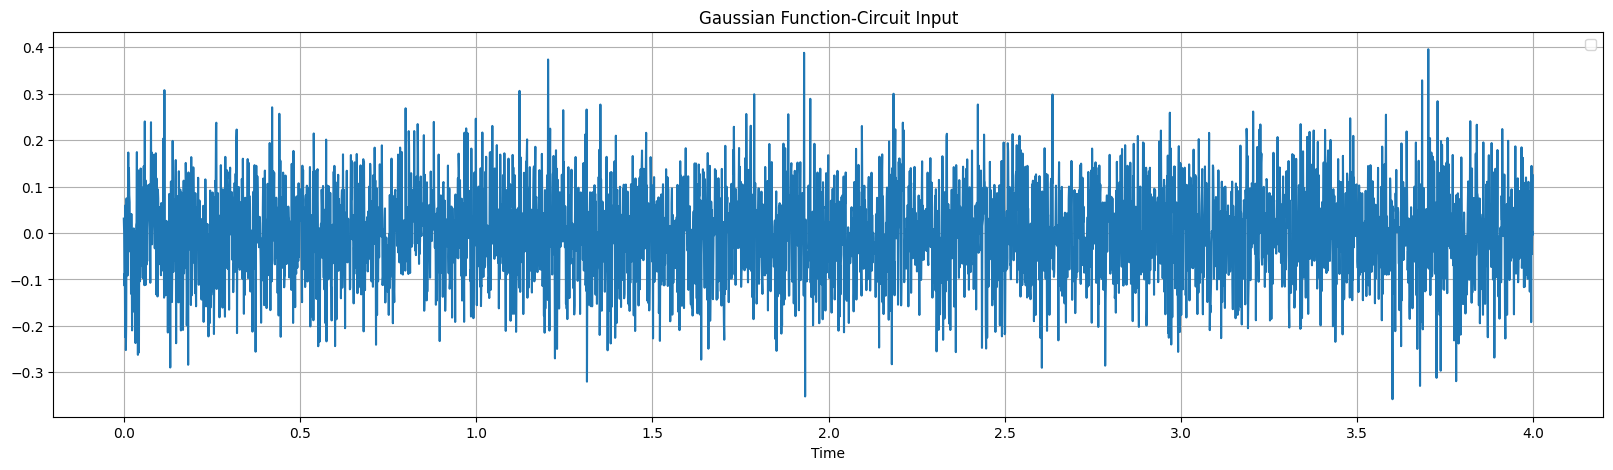

<Figure size 2000x500 with 0 Axes>

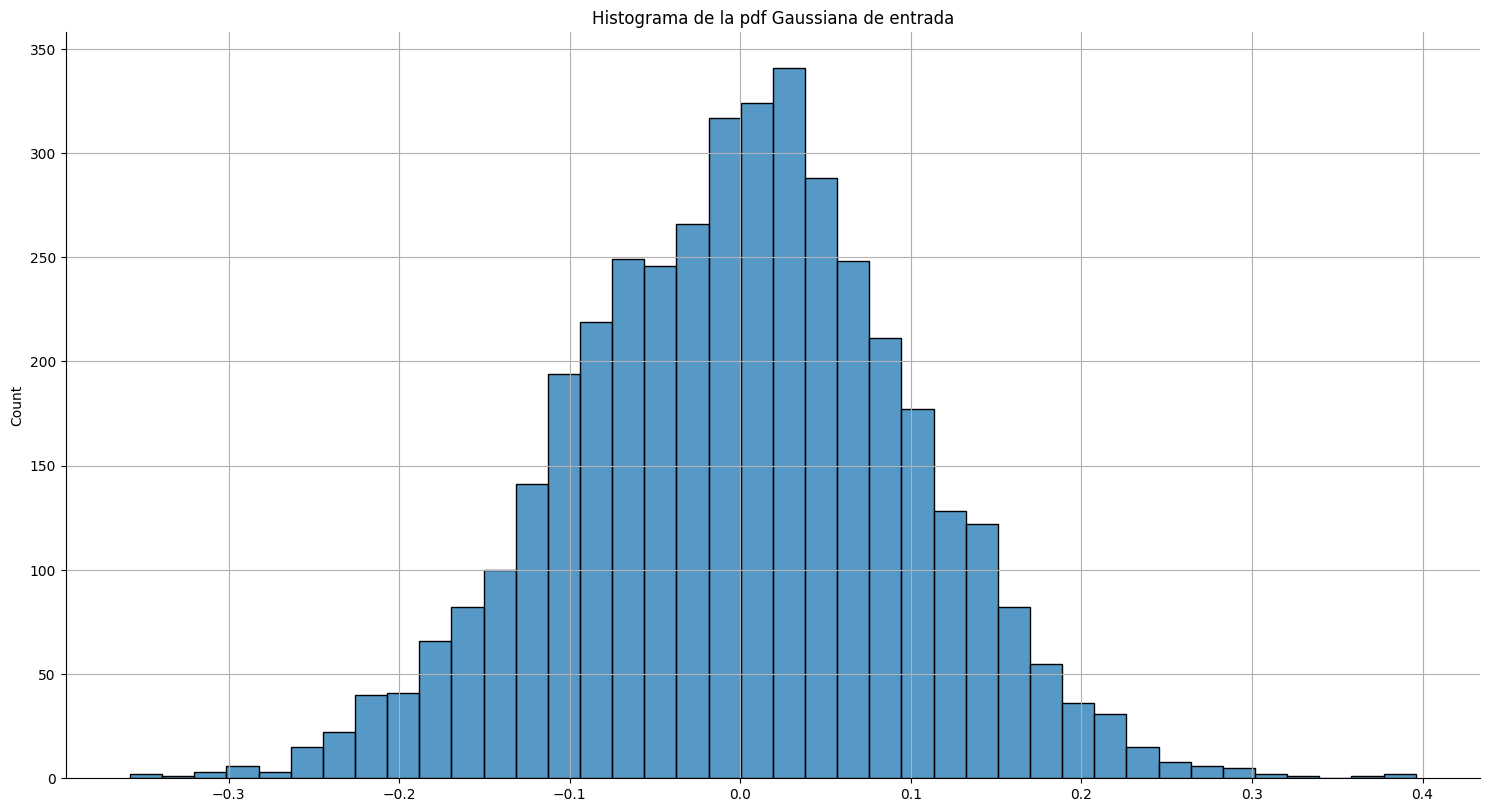

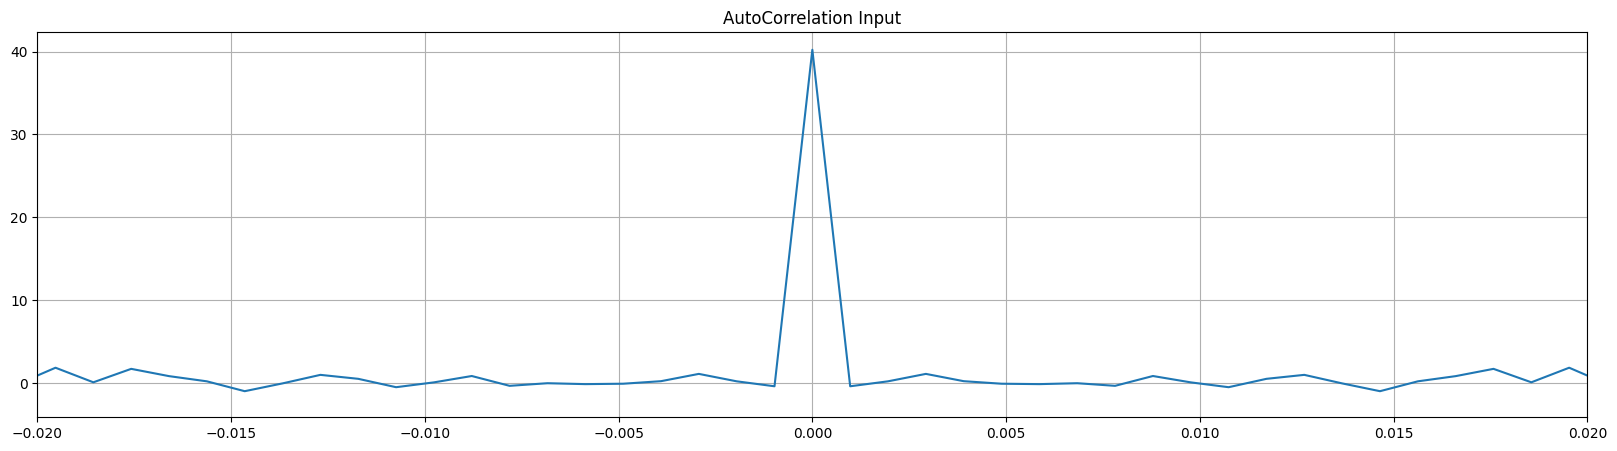

In [ ]:
## AHORA ANALIZANDO LA RESPUESTA AL IMPULSO DEL SISTEMA, Y ASIGNANDO LOS VALORES AL MODELADO DEL CIRCUITO:
##OBSERVAMOS LA RESPUESTA AL IMPULSO:
#Dando valores al circuito:

#Le asignamos valores a los componentes
C1=4.7e-1
C2=0.07e-1
R1=1000
R2=6
#escribimos los valores del numerador y denominador de la FT
Coeficientes_num=[C1*R1,0]
Coeficientes_dem=[C1*C2*R2*R1,C1*R1+C2*R1+C2*R2,1]
#Reemplazamos los componentes con los valores ya asignados
H_valores=H.subs("C1",C1).subs("C2",C2).subs("R1",R1).subs("R2",R2)
#Graficamos la funcion de transferencia (pasabandas)
W=logspace(-8,9,100)##Generamos vector de frecuencias 
X=H_valores(j*omega).dB.plot(W,log_frequency=True) #graficar la magnitud en db de la ft
### LE ASIGNAMOS LOS VALORES A NUESTRA FUNCIÓN DE TRANSFERENCIA PARA VER EL COMPORTAMIENTO DEL CIRCUITO

## FILTRO PASA BANDAS(IMPORTANTE)
lti_system = lti(Coeficientes_num, Coeficientes_dem)   #LTI
Nsample=4096 ## CANTIDAD DE MUESTRAS
t, h = lti_system.impulse(N=Nsample) # sistema LTI exitado con la función impulso
## NOS DEVUELVE 

plt.figure(figsize=(16, 9), dpi=60)
plt.plot(t, h, label='$h(t)$')

plt.grid(True)
plt.legend()
plt.title("Respuesta a impulso")
plt.xlabel("Tiempo [$s$]")
plt.ylabel("Amplitud")
plt.show()
## GENERAMOS LA ENTRADA DE NUESTRO CIRCUITO:

Nbins=int((1+3.322*np.log2(Nsample)))### NUMERO DE BINS PARA EL HISTOGRAMA
Fdisc=Nsample/4 # FRECUENCIA DE MUESTREO
Tdisc=1/Fdisc
t=np.arange(0,4,Tdisc) ## GENERAMOS VECTOR DE TIEMPO PARA NUESTRA FUNCIÓN ALEATORIA

#λ= np.pi     
#expt= expon.rvs(loc=0,scale=1/λ,size=Nsample,random_state=None)

### GENERAMOS UN RUIDO GAUSSIANO
sd=0.1
mean=0
input_gaussiana=np.random.normal(mean,sd,len(t)) 


Autocorrelacion_Gaussian=np.correlate(input_gaussiana,input_gaussiana,mode="same") ## GENERAMOS LA AUTOCORRELACION

plt.figure(figsize=(20,5))
plt.plot(t,input_gaussiana)
plt.title("Gaussian Function-Circuit Input")
plt.xlabel("Time")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20,5))
sns.displot(input_gaussiana,bins=Nbins,height=8, aspect=15/8)
#sns.set(rc = {'figure.figsize':(20,5)})
hist_kws={"edgecolor":"balck"}
plt.title("Histograma de la pdf Gaussiana de entrada")
plt.grid()
plt.show()

plt.figure(figsize=(20,5))
plt.plot(t-2,Autocorrelacion_Gaussian)
plt.xlim(-0.02,0.02)
hist_kws={"edgecolor":"balck"}
plt.title("AutoCorrelation Input")
plt.grid()
plt.show()

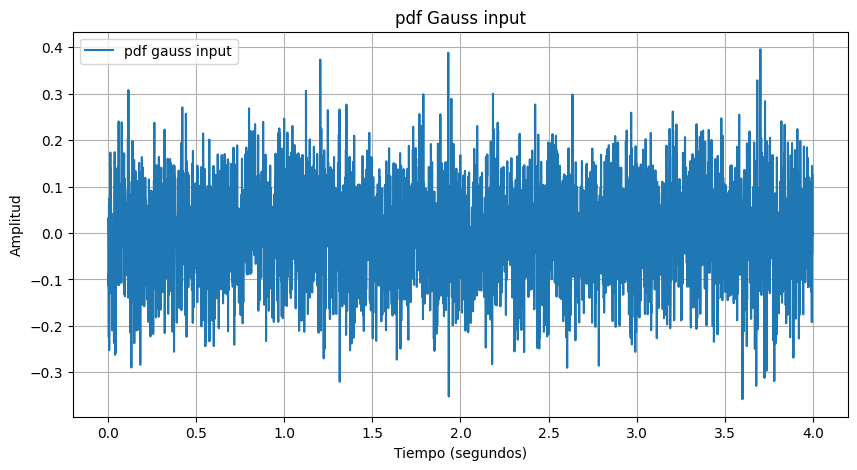

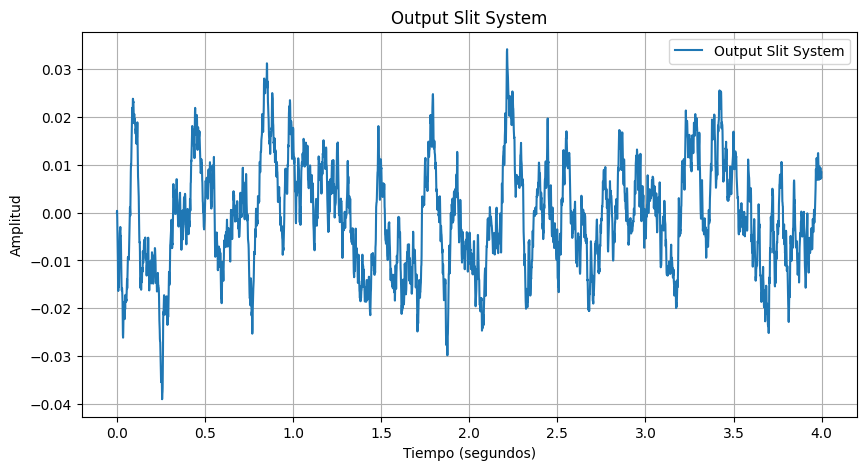

In [ ]:
###INGRESANDO AL SISTEMA SLIT:
#pdf de salida:
_,output_pdf,_=lti_system.output(input_gaussiana, t)
#pdf gaussiana Input
plt.figure(figsize=(10,5))
plt.title("pdf Gauss input")
plt.plot(t, input_gaussiana,label="pdf gauss input")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()
#pdf Output:
plt.figure(figsize=(10,5))
plt.title("Output Slit System")
plt.plot(t, output_pdf,label="Output Slit System")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

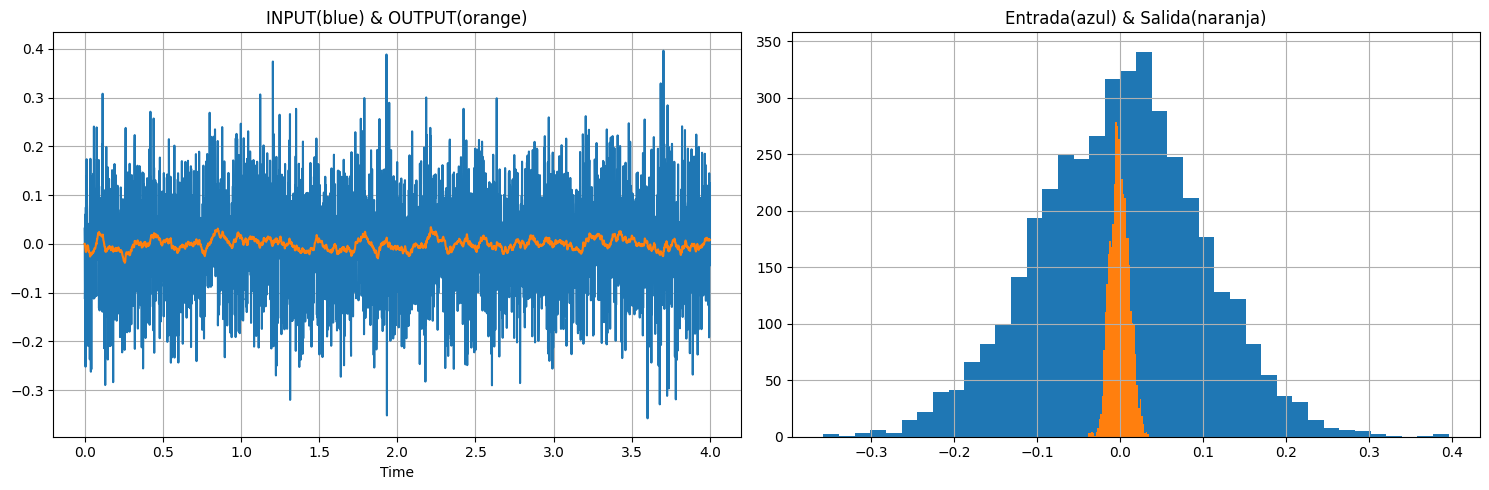

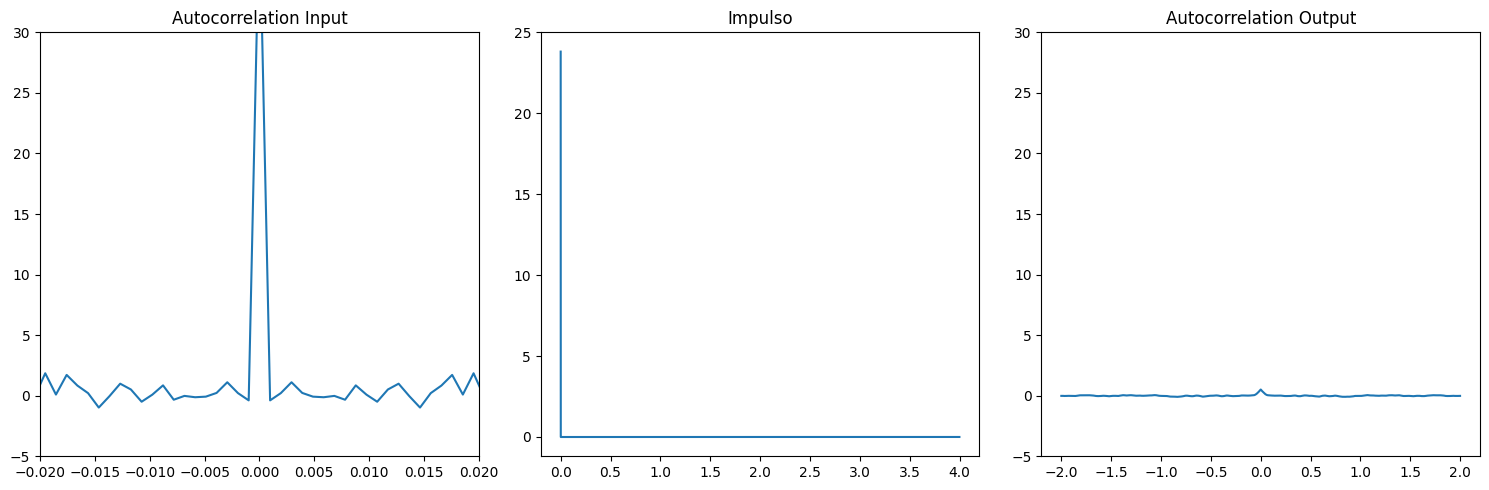

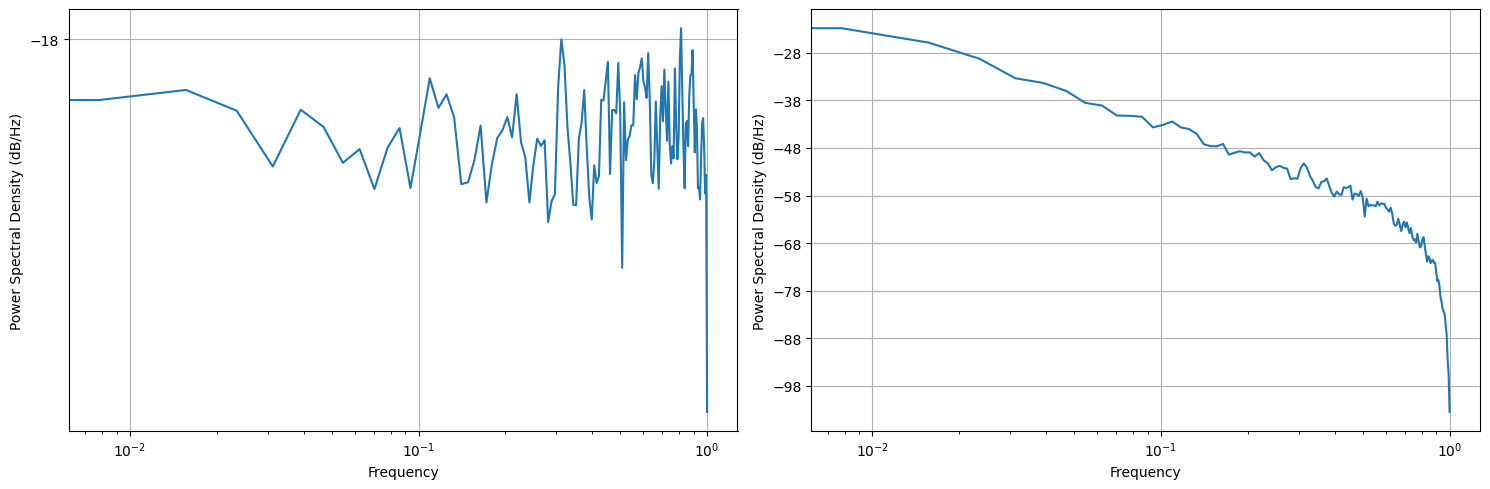

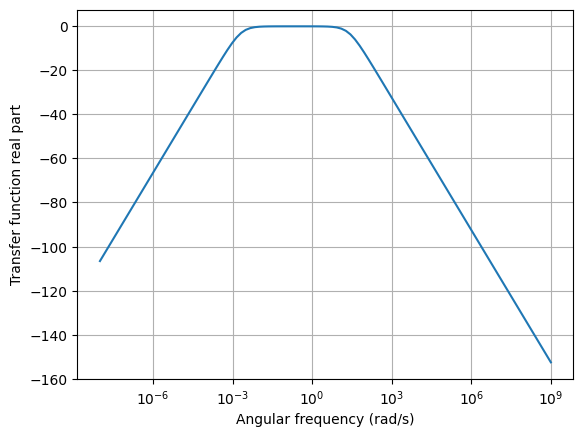

In [ ]:
fourier_transform = np.fft.rfft(input_gaussiana)

abs_fourier_transform = np.abs(fourier_transform)

power_spectrum = np.square(abs_fourier_transform)

frequency = np.linspace(0, 60/2, len(power_spectrum))
## INGRESAMOS LA ENTRADA EXPONENCIAL A NUESTRO CIRCUITO:
_,output_pdf,_=lti_system.output(input_gaussiana, t) ##SALIDA DEL CIRCUITO.
Autocorrelacion_Output_pdf=np.correlate(output_pdf,output_pdf,mode="same") ## GENERAMOS LA AUTOCORRELACION
# COMPARAMOS ENTRADA VS SALIDA 

fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(t, input_gaussiana)
axs[0].set_title("INPUT(blue) & OUTPUT(orange)")
axs[0].set_xlabel("Time")
axs[0].plot(t, output_pdf)
axs[0].grid()

axs[1].hist(input_gaussiana,bins=Nbins)


axs[1].hist(output_pdf,bins=Nbins)

axs[1].set_title("Entrada(azul) & Salida(naranja)")
axs[1].grid()

fig.tight_layout()
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].plot(t-2,Autocorrelacion_Gaussian)
axs[0].set_title("Autocorrelation Input")
axs[0].set_xlim(-0.02,0.02)
axs[0].set_ylim(-5,30)
axs[1].plot(t, h, label='$h(t)$')
axs[1].set_title("Impulso")
axs[2].plot(t-2, Autocorrelacion_Output_pdf)
axs[2].set_title("Autocorrelation Output")
#axs[2].set_xlim(-0.02,0.02)
axs[2].set_ylim(-5,30)

#axs[2].set_ylim(-30,30)


fig.tight_layout()

fig, axs = plt.subplots(1, 2, figsize=(15,5))

#POWER SPECTRUM
axs[0].psd(input_gaussiana)
axs[0].semilogx()

axs[1].psd(output_pdf)
axs[1].semilogx()
#axs[1].set_ylim(-25,-18)
X=H_valores(j*omega).dB.plot(W,log_frequency=True)


fourier_transform3 = np.fft.rfft(output_pdf)

abs_fourier_transform3 = np.abs(fourier_transform3)

power_spectrum3 = np.square(abs_fourier_transform3)

frequency3 = np.linspace(0, 60/2, len(power_spectrum3))


#axs[2].plot(frequency, power_spectrum)
#axs[2].plot(frequency3, power_spectrum3)

fig.tight_layout()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input_gaussiana, output_pdf)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

print(X_train.shape)
print(X_val.shape)
#Copiamos las particiones en otras variables
### NORMALIZAMOS LOS DATOS PARA TENER UNA MISMA DISTRIBUCIÓN PARA TODOS.
mean=X_train.mean(axis=0)
X_train=X_train-mean
std=X_train.std(axis=0)
X_train=X_train/(std**2)

#print(X_train.shape)

## HACEMOS LO MISMO CON LOS DATOS DE TESTEO Y VAL
## PERO TENIENDO EN CUENTA LA MEDIA Y VARIANZA DE LOS DATOS DE TRAIN PUESTO QUE LOS DE TEST Y VAL EN TEORIA NO LOS TENGO.


X_test=X_test-mean
X_test=X_test/(std**2)

X_val=X_val-mean
X_val=X_val/(std**2)

(2304,)
(768,)


In [ ]:
### ORGANIZAMOS LOS DATOS DE TESTEO 
X_train=X_train.reshape(len(X_train),1) ### LO GENERAMOS COMO UN TENSOR PARA QUE SEA MAS FACIL RECONOCERLO.
X_test=X_test.reshape(len(X_test),1)
X_val=X_val.reshape(len(X_val),1)

y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)
y_val=y_val.reshape(len(y_val),1)

print(X_train.shape)
print(y_train.shape)

(2304, 1)
(2304, 1)


In [ ]:
###### GENERAMOS EL MODELO
modelo=models.Sequential()
#### CARGAMOS LAS CAPAS
modelo.add(Dense(20,activation="relu",input_shape=(1,1))) ## SIEMPRE MIRAR LA SEGUNDA DIMENSION
modelo.add(Dropout(0.8))
modelo.add(Dense(20,activation="relu")) ## SIEMPRE MIRAR LA SEGUNDA DIMENSION
modelo.add(Dense(20,activation="relu",kernel_regularizer=regularizers.l1(0.001))) ## SIEMPRE MIRAR LA SEGUNDA DIMENSION
modelo.add(Dense(20,activation="relu",kernel_regularizer=regularizers.l2(0.001)))
modelo.add(Dense(1)) ## COMO ES LINEAL LA SALIDA NO NECESITO PONERLE UNA CAPA DE ACTIVACIÓN
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1, 20)             40        
                                                                 
 dropout_2 (Dropout)         (None, 1, 20)             0         
                                                                 
 dense_11 (Dense)            (None, 1, 20)             420       
                                                                 
 dense_12 (Dense)            (None, 1, 20)             420       
                                                                 
 dense_13 (Dense)            (None, 1, 20)             420       
                                                                 
 dense_14 (Dense)            (None, 1, 1)              21        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-traina

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)
### GENERAMOS EL ENTRENAMIENTO 
#### COMPILAMOS EL MODELO 
modelo.compile(optimizer=optimizers.RMSprop(lr=0.01),loss="mae",)
history=modelo.fit(X_train,
         y_train,
         batch_size=4
         ,validation_data=(X_val,y_val),
         callbacks=[early],
         epochs=50)

/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
Epoch 1/50
576/576 [==============================] - 7s 9ms/step - loss: 0.0750 - val_loss: 0.0120
Epoch 2/50
576/576 [==============================] - 4s 8ms/step - loss: 0.0126 - val_loss: 0.0114
Epoch 3/50
576/576 [==============================] - 6s 10ms/step - loss: 0.0127 - val_loss: 0.0111
Epoch 4/50
576/576 [==============================] - 5s 9ms/step - loss: 0.0126 - val_loss: 0.0112
Epoch 5/50
576/576 [==============================] - 6s 10ms/step - loss: 0.0127 - val_loss: 0.0121
Epoch 6/50
576/576 [==============================] - 5s 8ms/step - loss: 0.0125 - val_loss: 0.0122
Epoch 7/50
576/576 [==============================] - 5s 9ms/step - loss: 0.0125 - val_loss: 0.0110
Epoch 8/50
576/576 [==============================] - 4s 8ms/step - loss: 0.0128 - val_l

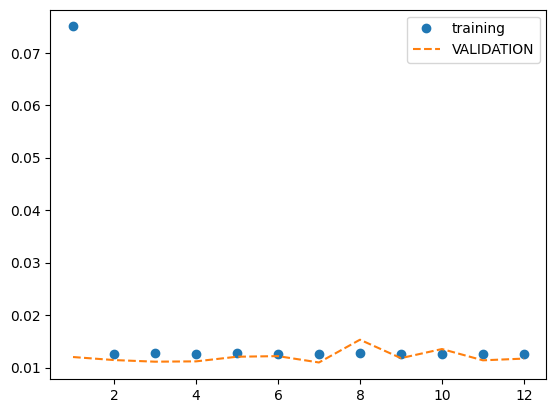

In [ ]:
history_dict=history.history
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]
epoch=range(1,len(loss_values)+1)
plt.plot(epoch,loss_values,"o",label="training")

plt.plot(epoch,val_loss_values,"--",label="VALIDATION")
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm
modelo.evaluate(X_test, y_test)

32/32 [==============================] - 1s 5ms/step - loss: 0.0118


In [ ]:
def Solucion(var):
    input_gaussiana=np.random.normal(1/np.pi,var,4096)
    _,Result_Circuit,_=lti_system.output(input_gaussiana, t)
    Result_Red=np.array(modelo.predict(X_train)).reshape(2304)
    Result_Circuit=np.correlate(Result_Circuit,Result_Circuit,mode="same")
    Salida_circuito=[]
    Salida_Redes=[]
    for i in range(2304):
            Salida_circuito.append(Result_Circuit[i])
            Salida_Redes.append(Result_Red[i])
    lr_model = sm.OLS(Salida_Redes,Salida_circuito)
    results = lr_model.fit() 
    return results.rsquared
  
# We double all numbers using map()
var=np.arange(0.1,31.1,1)
dict={}
arreglo=[]
for i in range(0,len(var)):
    dict[var[i]]=[Solucion(var[i])]
    arreglo.append(Solucion(var[i]))

72/72 [==============================] - 0s 5ms/step


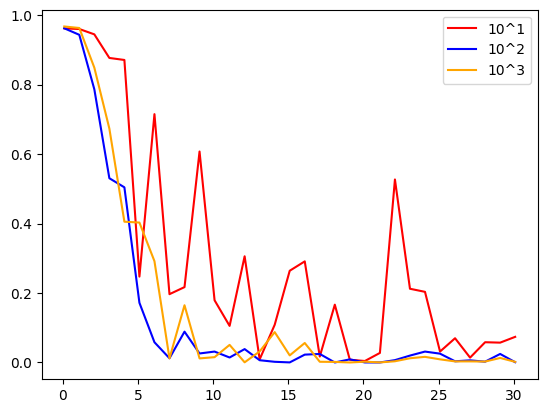

In [ ]:
import pandas as pd


arreglo2=pd.DataFrame.from_dict(dict)
plt.plot(var, arreglo, color='red')
plt.plot(varr,arregloo, color='blue')
plt.plot(varrr, arreglooo, color='orange')
plt.legend(['10^1', '10^2', '10^3'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=671a449e-be09-4113-bc97-6b850ce0e6ee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>